In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
from scipy.ndimage import gaussian_filter1d

In [2]:
DQN_Reward = pd.read_csv('data/DQN/DQN-Reward.csv')
DQSN_Reward = pd.read_csv('data/16-256/16-256-DQSN-Reward.csv')

In [3]:
steps_dqn_reward = DQN_Reward['Step']
values_dqn_reward = DQN_Reward['Value']
steps_dqsn_reward = DQSN_Reward['Step']
values_dqsn_reward = DQSN_Reward['Value']

In [4]:
smoothed_dqn_reward = gaussian_filter1d(values_dqn_reward, sigma=5)
smoothed_dqsn_reward = gaussian_filter1d(values_dqsn_reward, sigma=5)

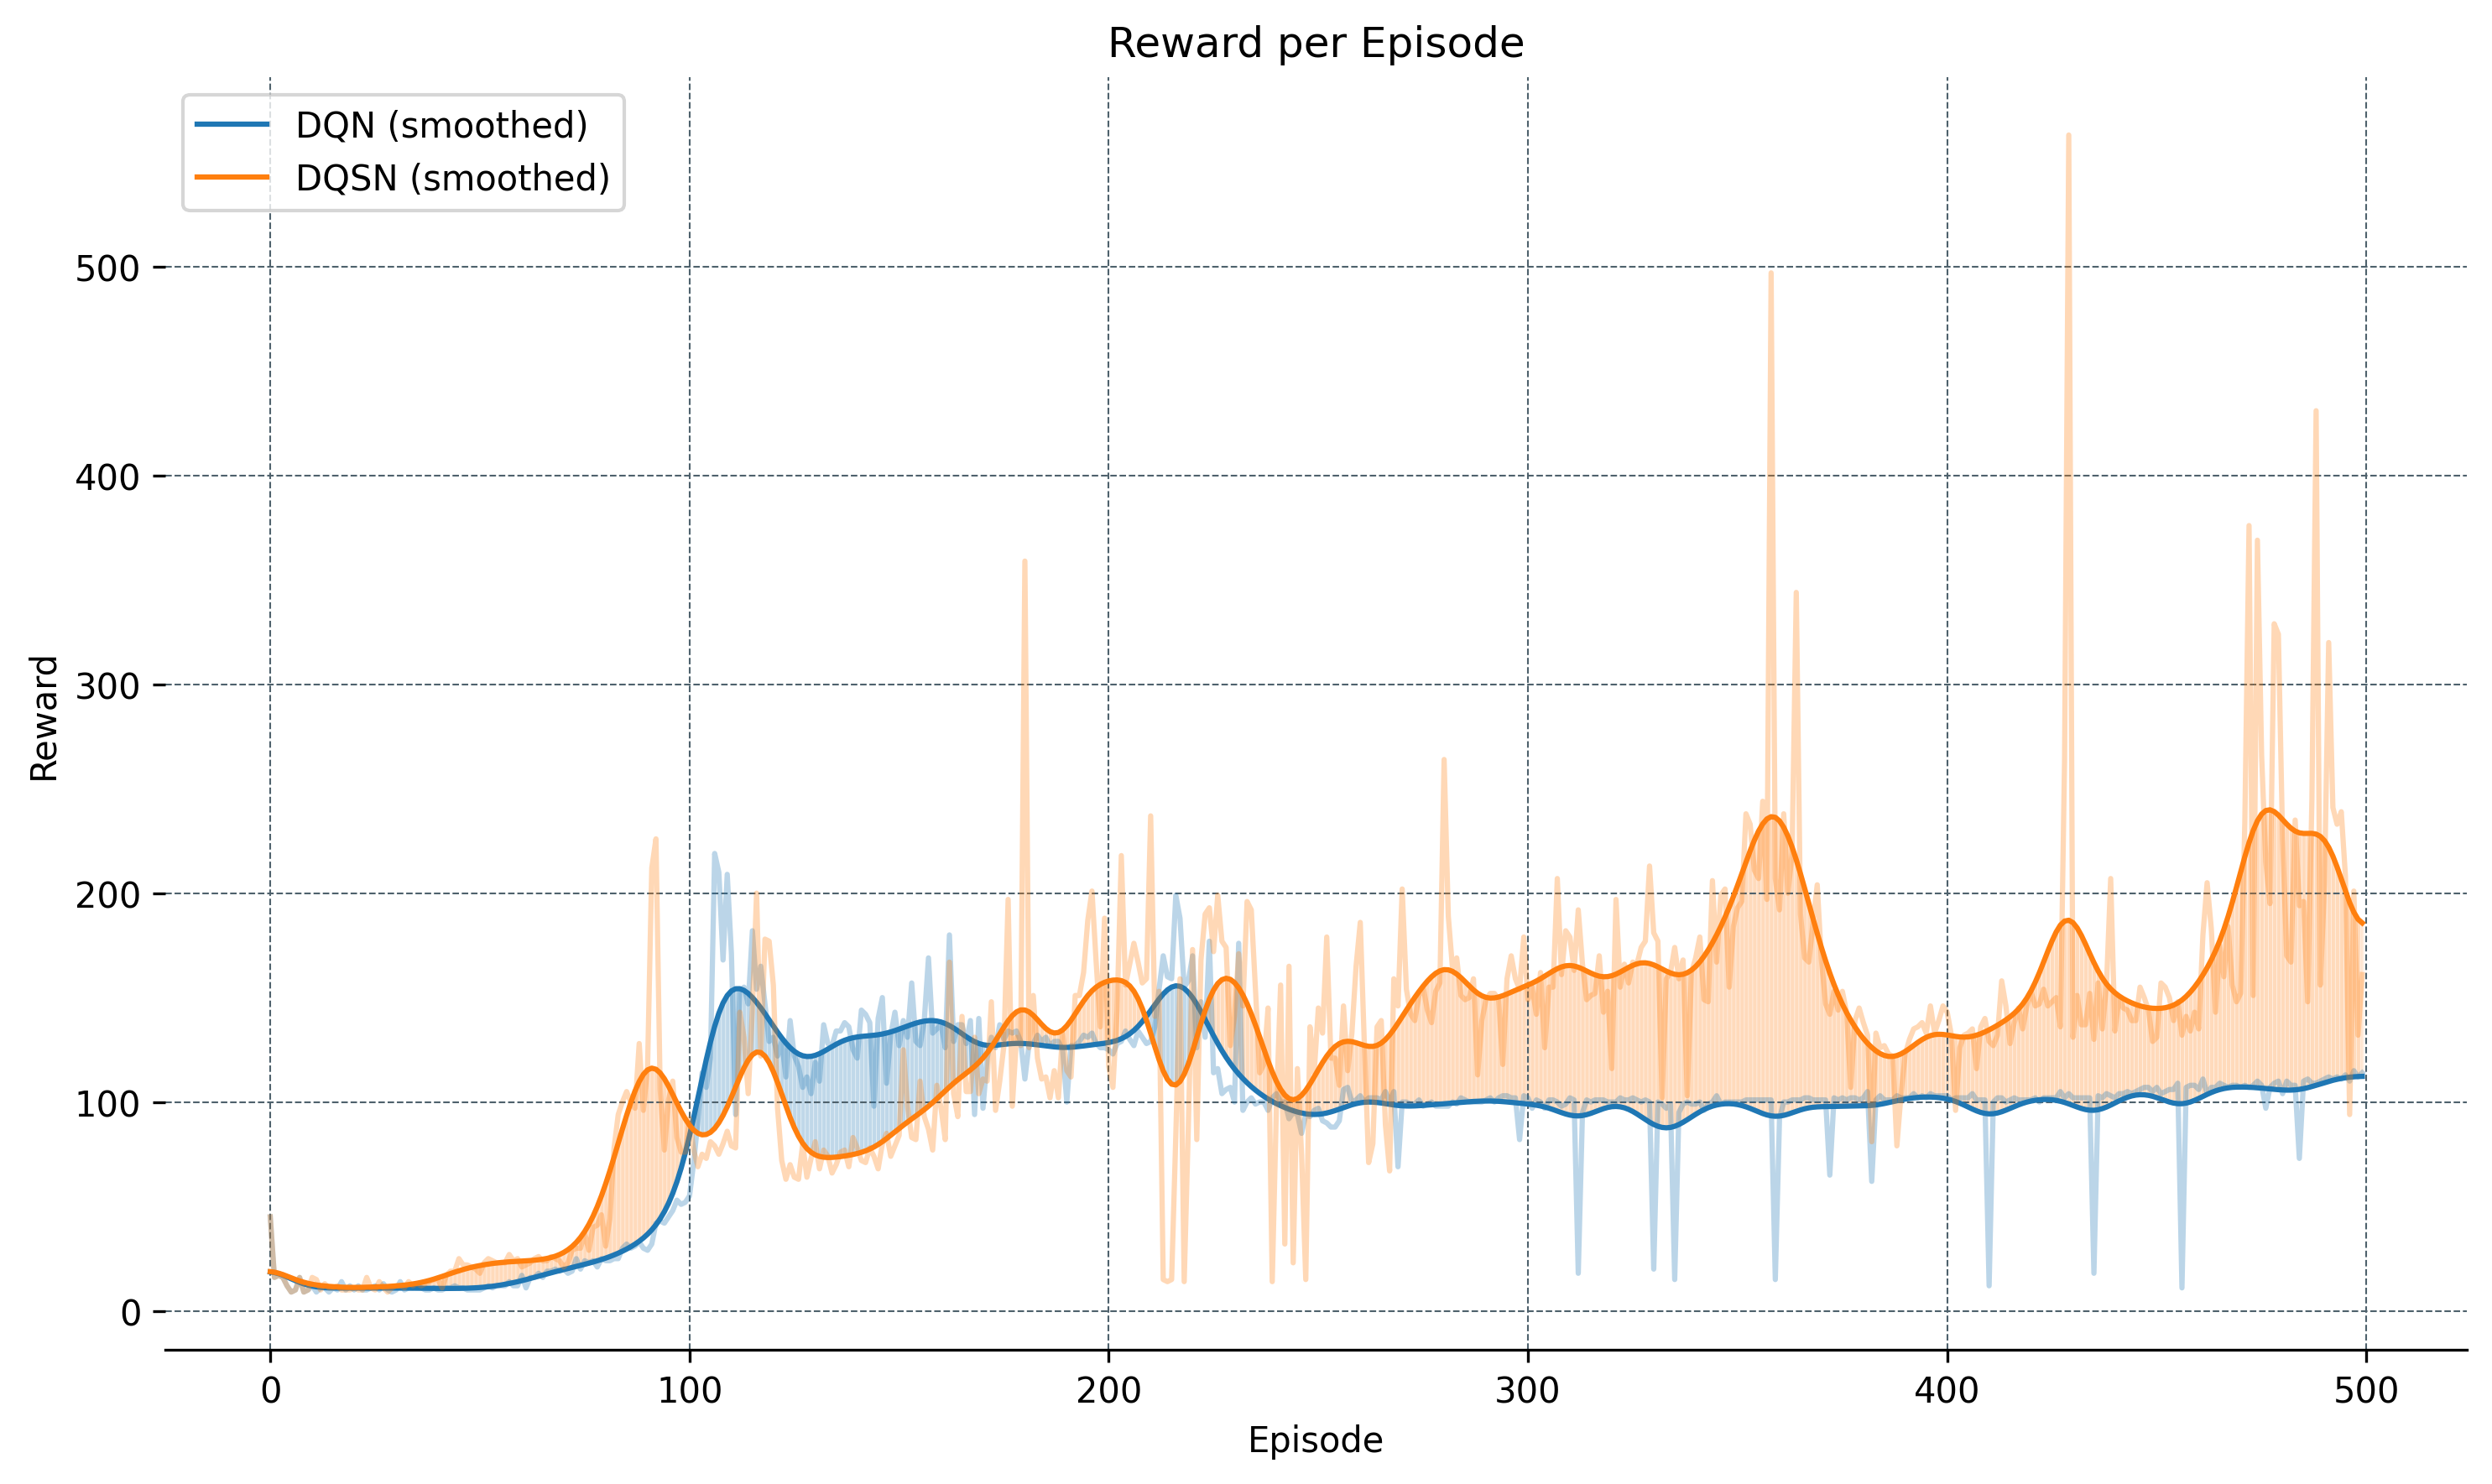

In [5]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(ls = "--", lw = 0.5, color = "#4E616C")

plt.plot(DQN_Reward['Step'], DQN_Reward['Value'], alpha=0.3)
plt.plot(steps_dqn_reward, smoothed_dqn_reward, label='DQN (smoothed)', color='#1f77b4')
plt.plot(DQSN_Reward['Step'], DQSN_Reward['Value'], alpha=0.3)
plt.plot(steps_dqsn_reward, smoothed_dqsn_reward, label='DQSN (smoothed)', color='#ff7f0e')

# 填充两条曲线之间的区域，根据大小填充不同的颜色
for i in range(len(steps_dqn_reward) - 1):
    if smoothed_dqn_reward[i] > smoothed_dqsn_reward[i]:
        plt.fill_between(steps_dqn_reward[i:i+2], smoothed_dqn_reward[i:i+2], smoothed_dqsn_reward[i:i+2], color='#1f77b4', alpha=0.1)
    else:
        plt.fill_between(steps_dqn_reward[i:i+2], smoothed_dqn_reward[i:i+2], smoothed_dqsn_reward[i:i+2], color='#ff7f0e', alpha=0.1)
    

plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward per Episode')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
DQN_Loss = pd.read_csv('data/DQN/DQN-Loss.csv')
DQSN_Loss = pd.read_csv('data/16-256/16-256-DQSN-Loss.csv')

steps_dqn_loss = DQN_Loss['Step']
values_dqn_loss = DQN_Loss['Value']
steps_dqsn_loss = DQSN_Loss['Step']
values_dqsn_loss = DQSN_Loss['Value']


In [7]:
smoothed_dqn_loss = gaussian_filter1d(values_dqn_loss, sigma=5)
smoothed_dqsn_loss = gaussian_filter1d(values_dqsn_loss, sigma=5)

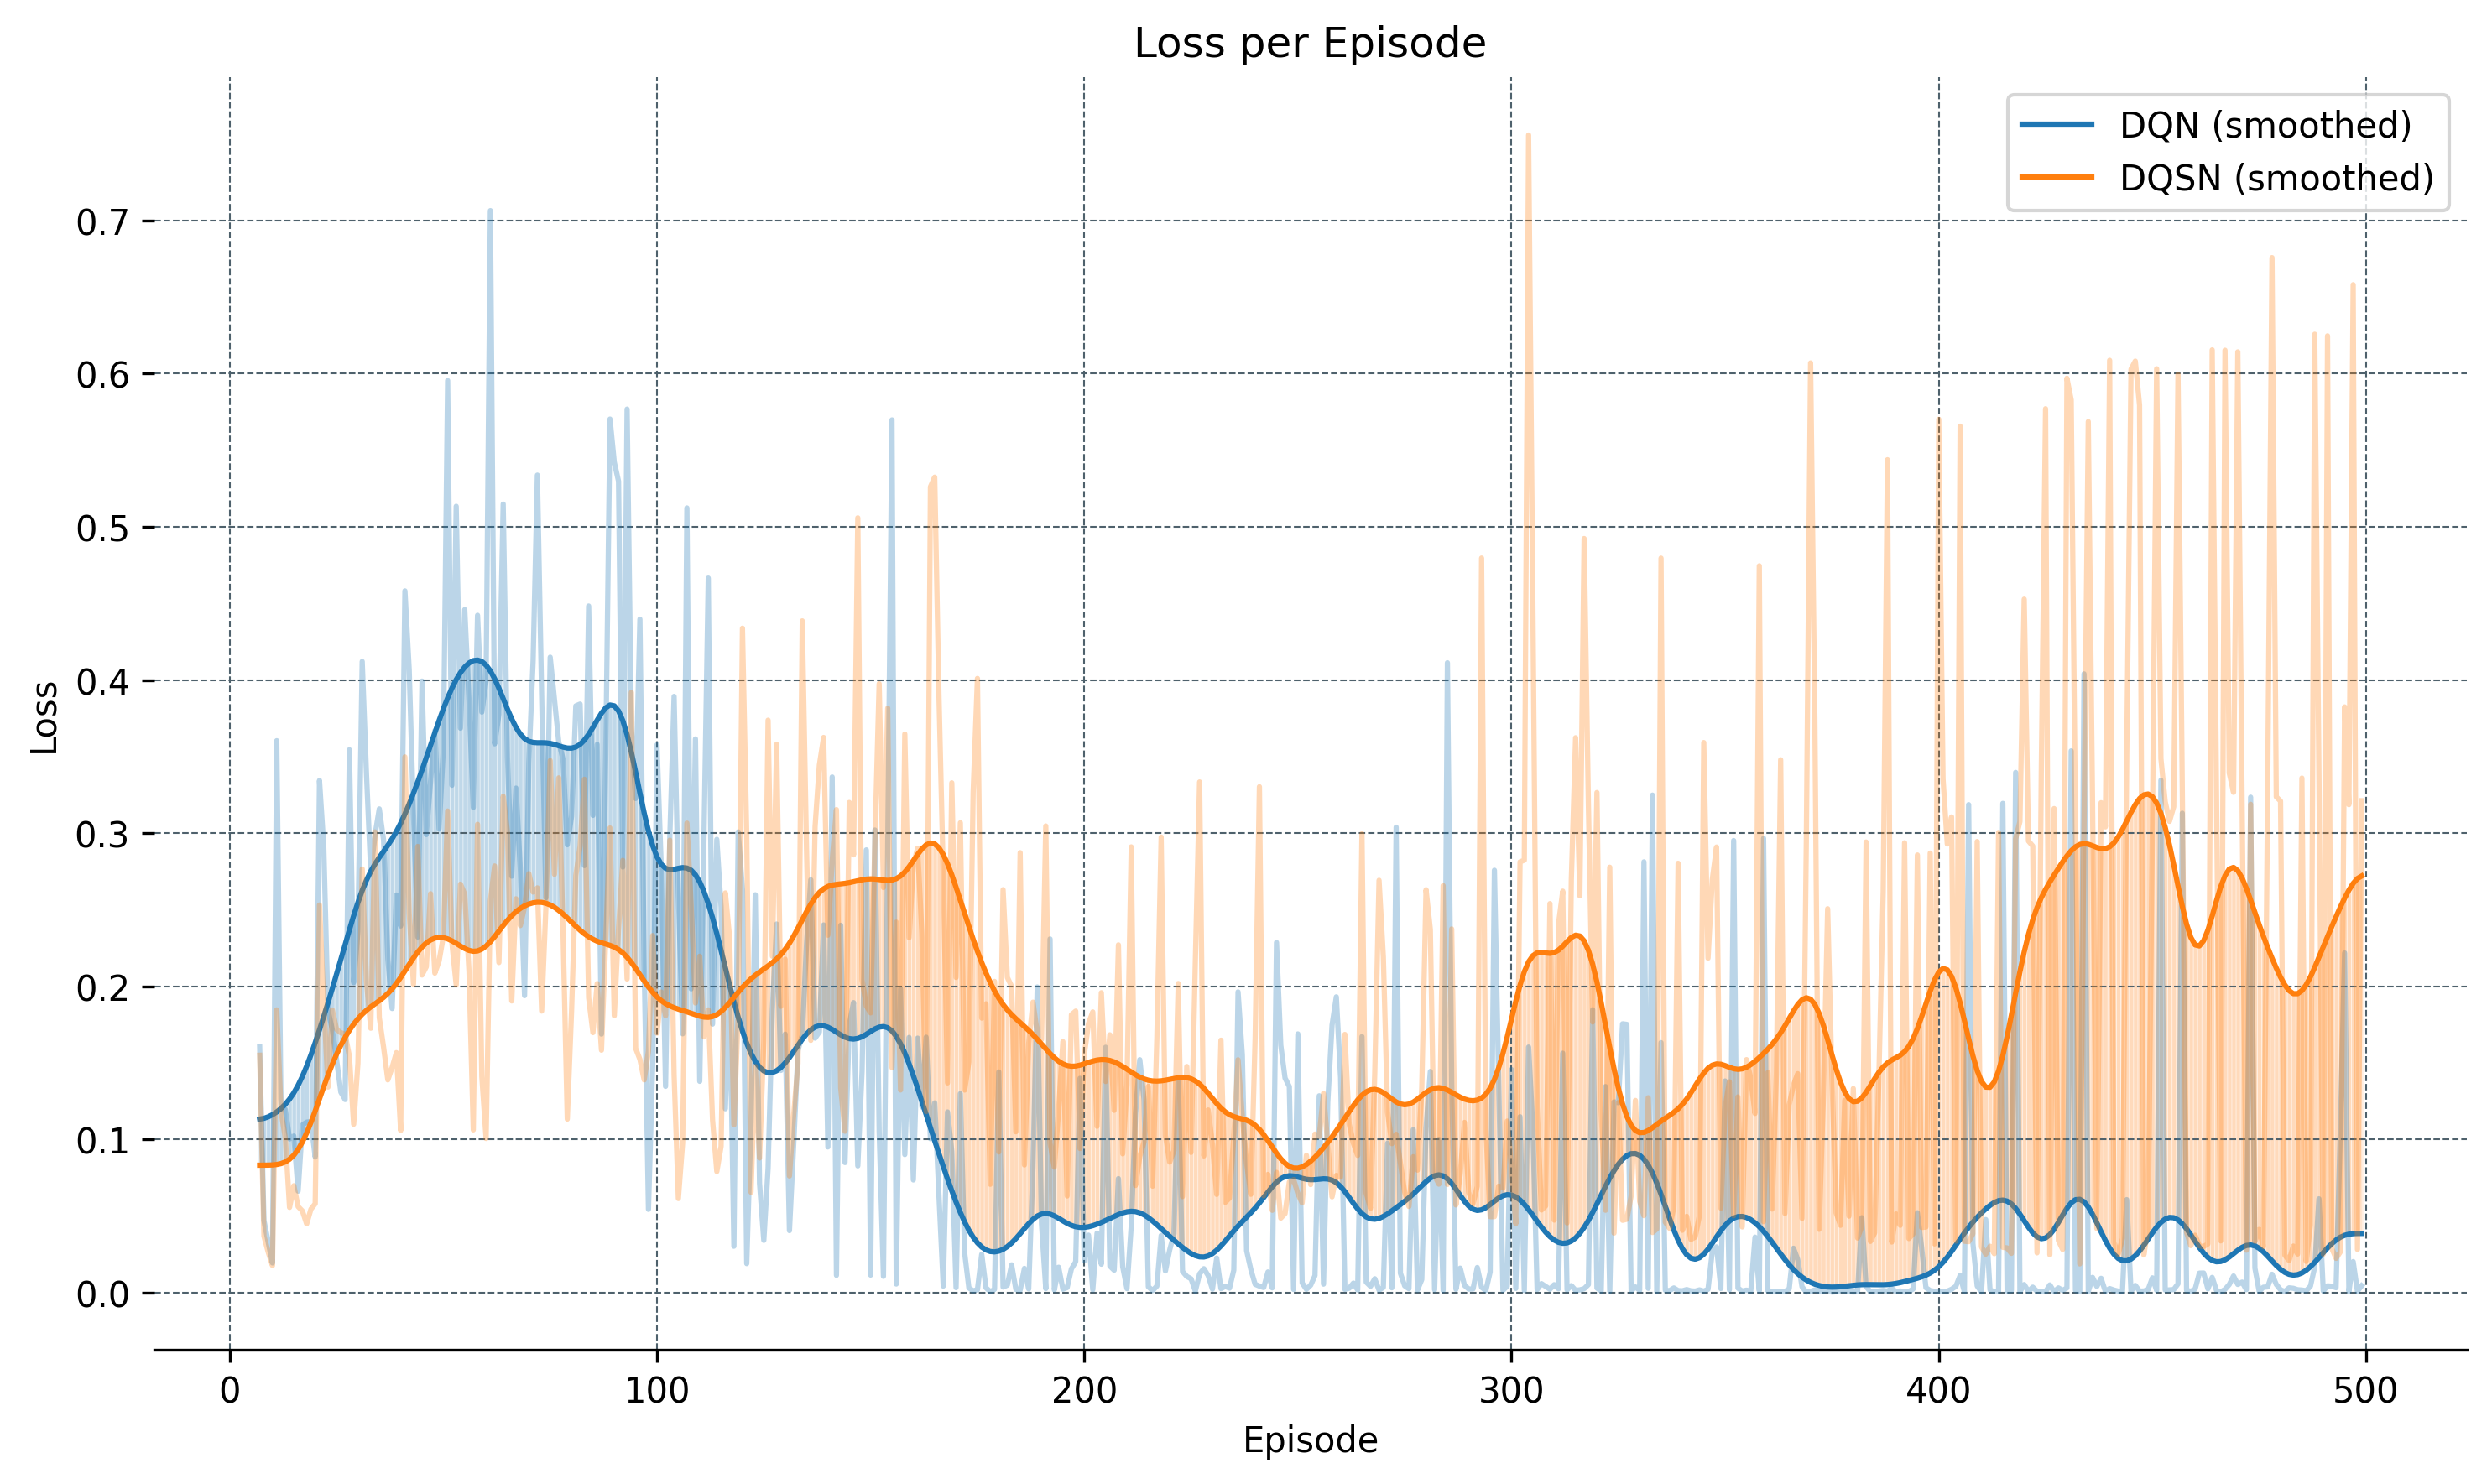

In [8]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(ls = "--", lw = 0.5, color = "#4E616C")

plt.plot(DQN_Loss['Step'], DQN_Loss['Value'], alpha=0.3)
plt.plot(steps_dqn_loss, smoothed_dqn_loss, label='DQN (smoothed)', color='#1f77b4')
plt.plot(DQSN_Loss['Step'], DQSN_Loss['Value'], alpha=0.3)
plt.plot(steps_dqsn_loss, smoothed_dqsn_loss, label='DQSN (smoothed)', color='#ff7f0e')

# 填充两条曲线之间的区域，根据大小填充不同的颜色
for i in range(len(steps_dqn_loss) - 1):
    if smoothed_dqn_loss[i] > smoothed_dqsn_loss[i]:
        plt.fill_between(steps_dqn_loss[i:i+2], smoothed_dqn_loss[i:i+2], smoothed_dqsn_loss[i:i+2], color='#1f77b4', alpha=0.1)
    else:
        plt.fill_between(steps_dqn_loss[i:i+2], smoothed_dqn_loss[i:i+2], smoothed_dqsn_loss[i:i+2], color='#ff7f0e', alpha=0.1)

plt.xlabel('Episode')
plt.ylabel('Loss')
plt.title('Loss per Episode')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
par_type = ["8-256", "16-256", "8-512", "16-512"]
sum_rewards = []
for pt in par_type:
    sum_reward = []
    for i in range(1,101):
        df = pd.read_csv(f'data/{pt}/Trail_{i}.csv')
        sum_reward.append(df['Rewards'].sum())
    sum_rewards.append(sum_reward)

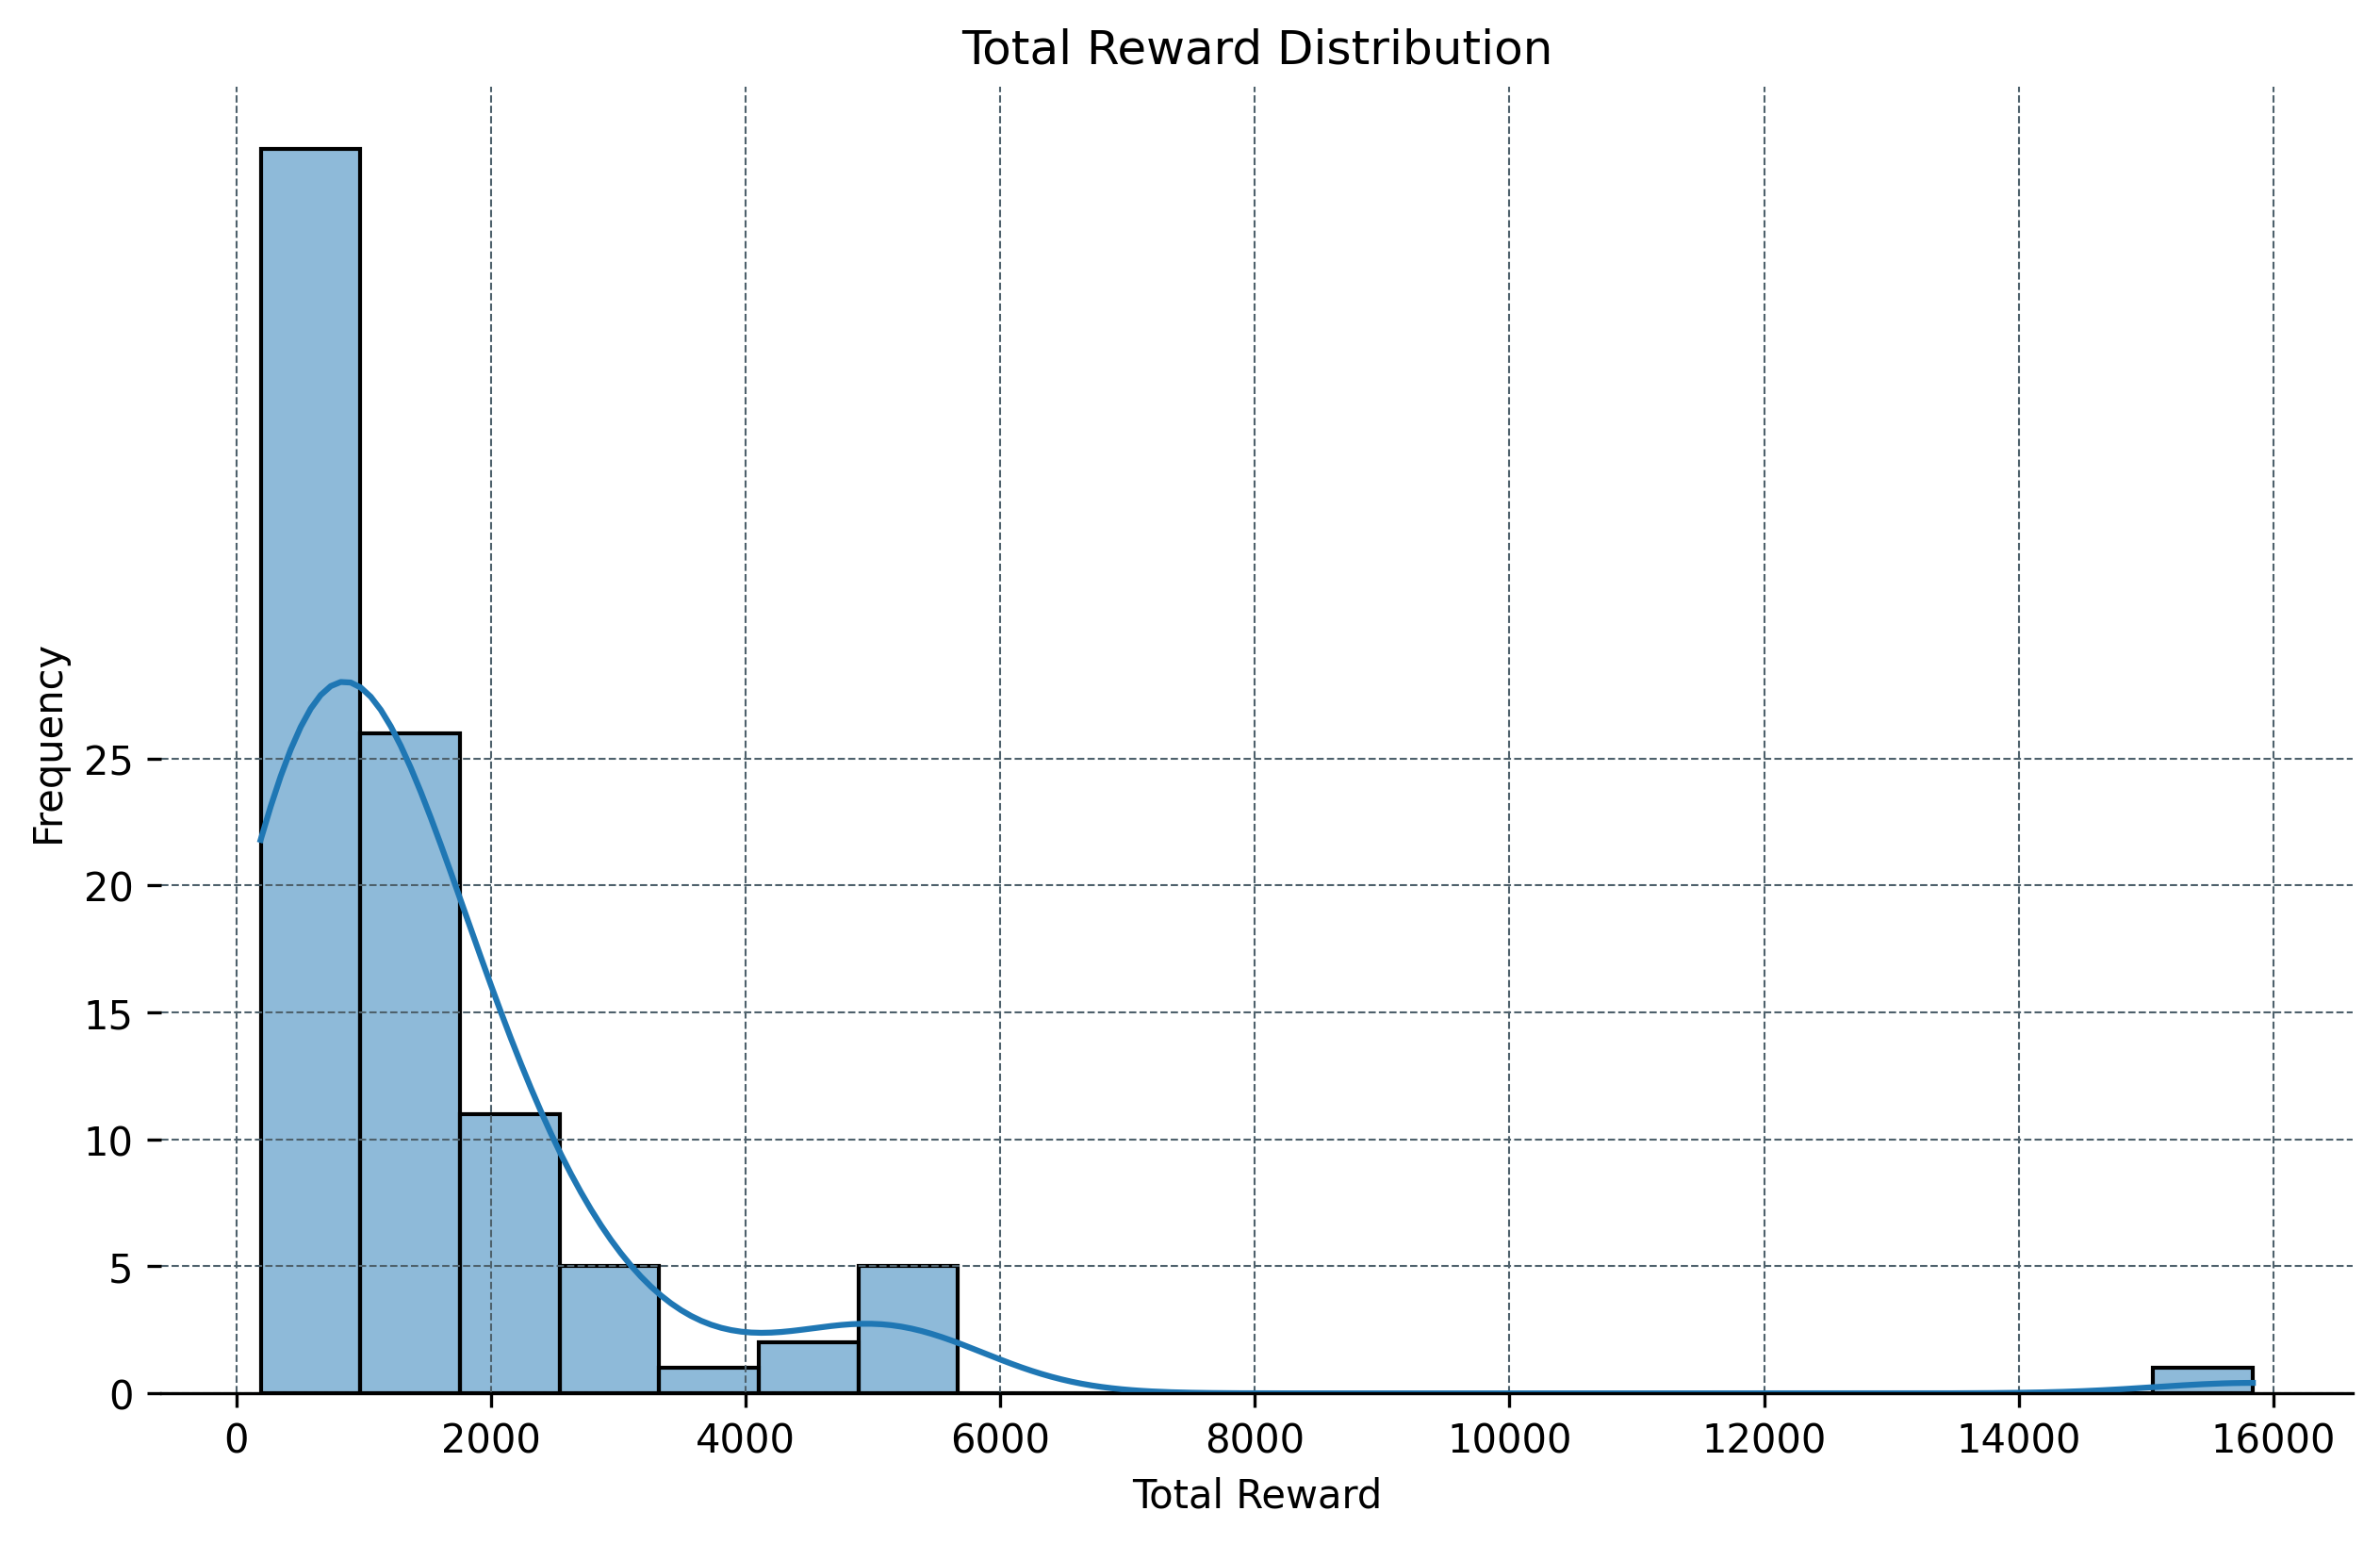

In [14]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(ls = "--", lw = 0.5, color = "#4E616C")

sns.histplot(sum_rewards[3], bins=20, kde=True, color='#1f77b4')
plt.yticks(np.arange(0, 30, 5))
plt.xlabel('Total Reward')
plt.ylabel('Frequency')
plt.title('Total Reward Distribution')
plt.show()


In [12]:
all_data = []
for pt, rewards in zip(par_type, sum_rewards):
    for reward in rewards:
        all_data.append({'Parameter': pt, 'Total Reward': reward})

df = pd.DataFrame(all_data)


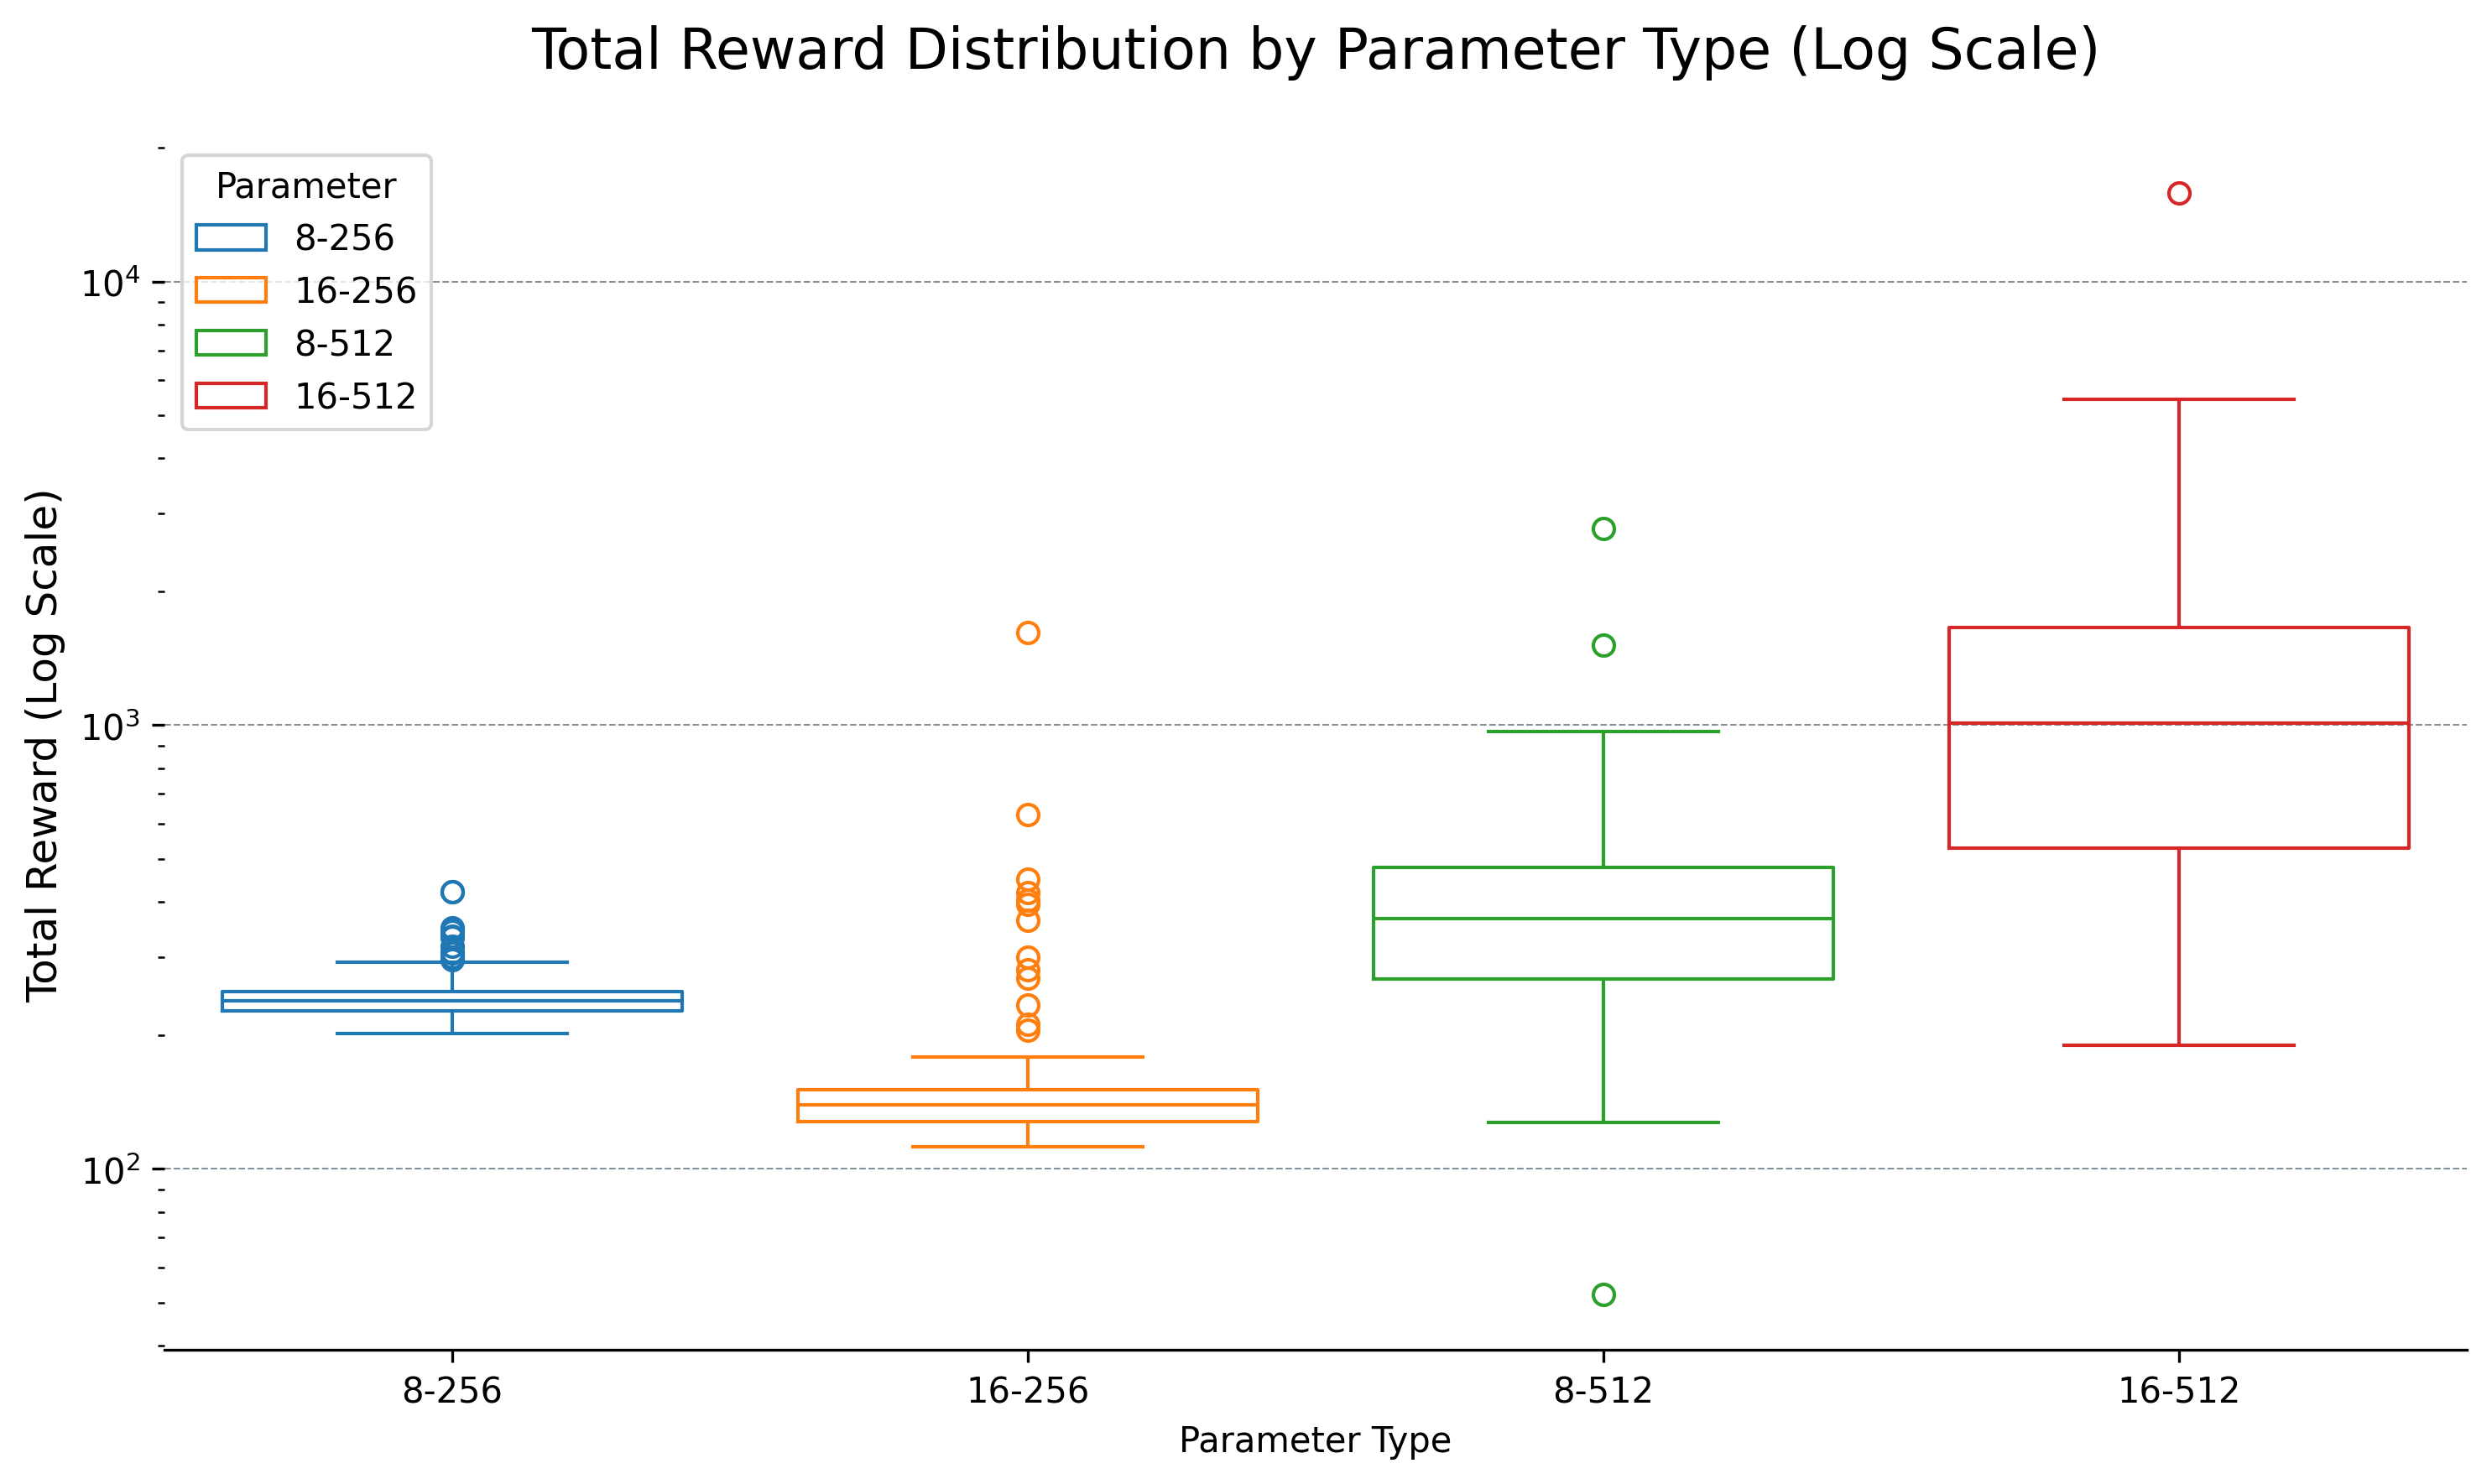

In [32]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(ls = "--", lw = 0.5, color = "#4E616C")
sns.boxplot(x='Parameter', y='Total Reward', data=df, hue="Parameter", fill=False, linewidth=1, legend=True, log_scale=True)
# plt.yscale('log')

plt.title('Total Reward Distribution by Parameter Type (Log Scale)', fontsize=16, pad=20)
plt.xlabel('Parameter Type')
plt.ylabel('Total Reward (Log Scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

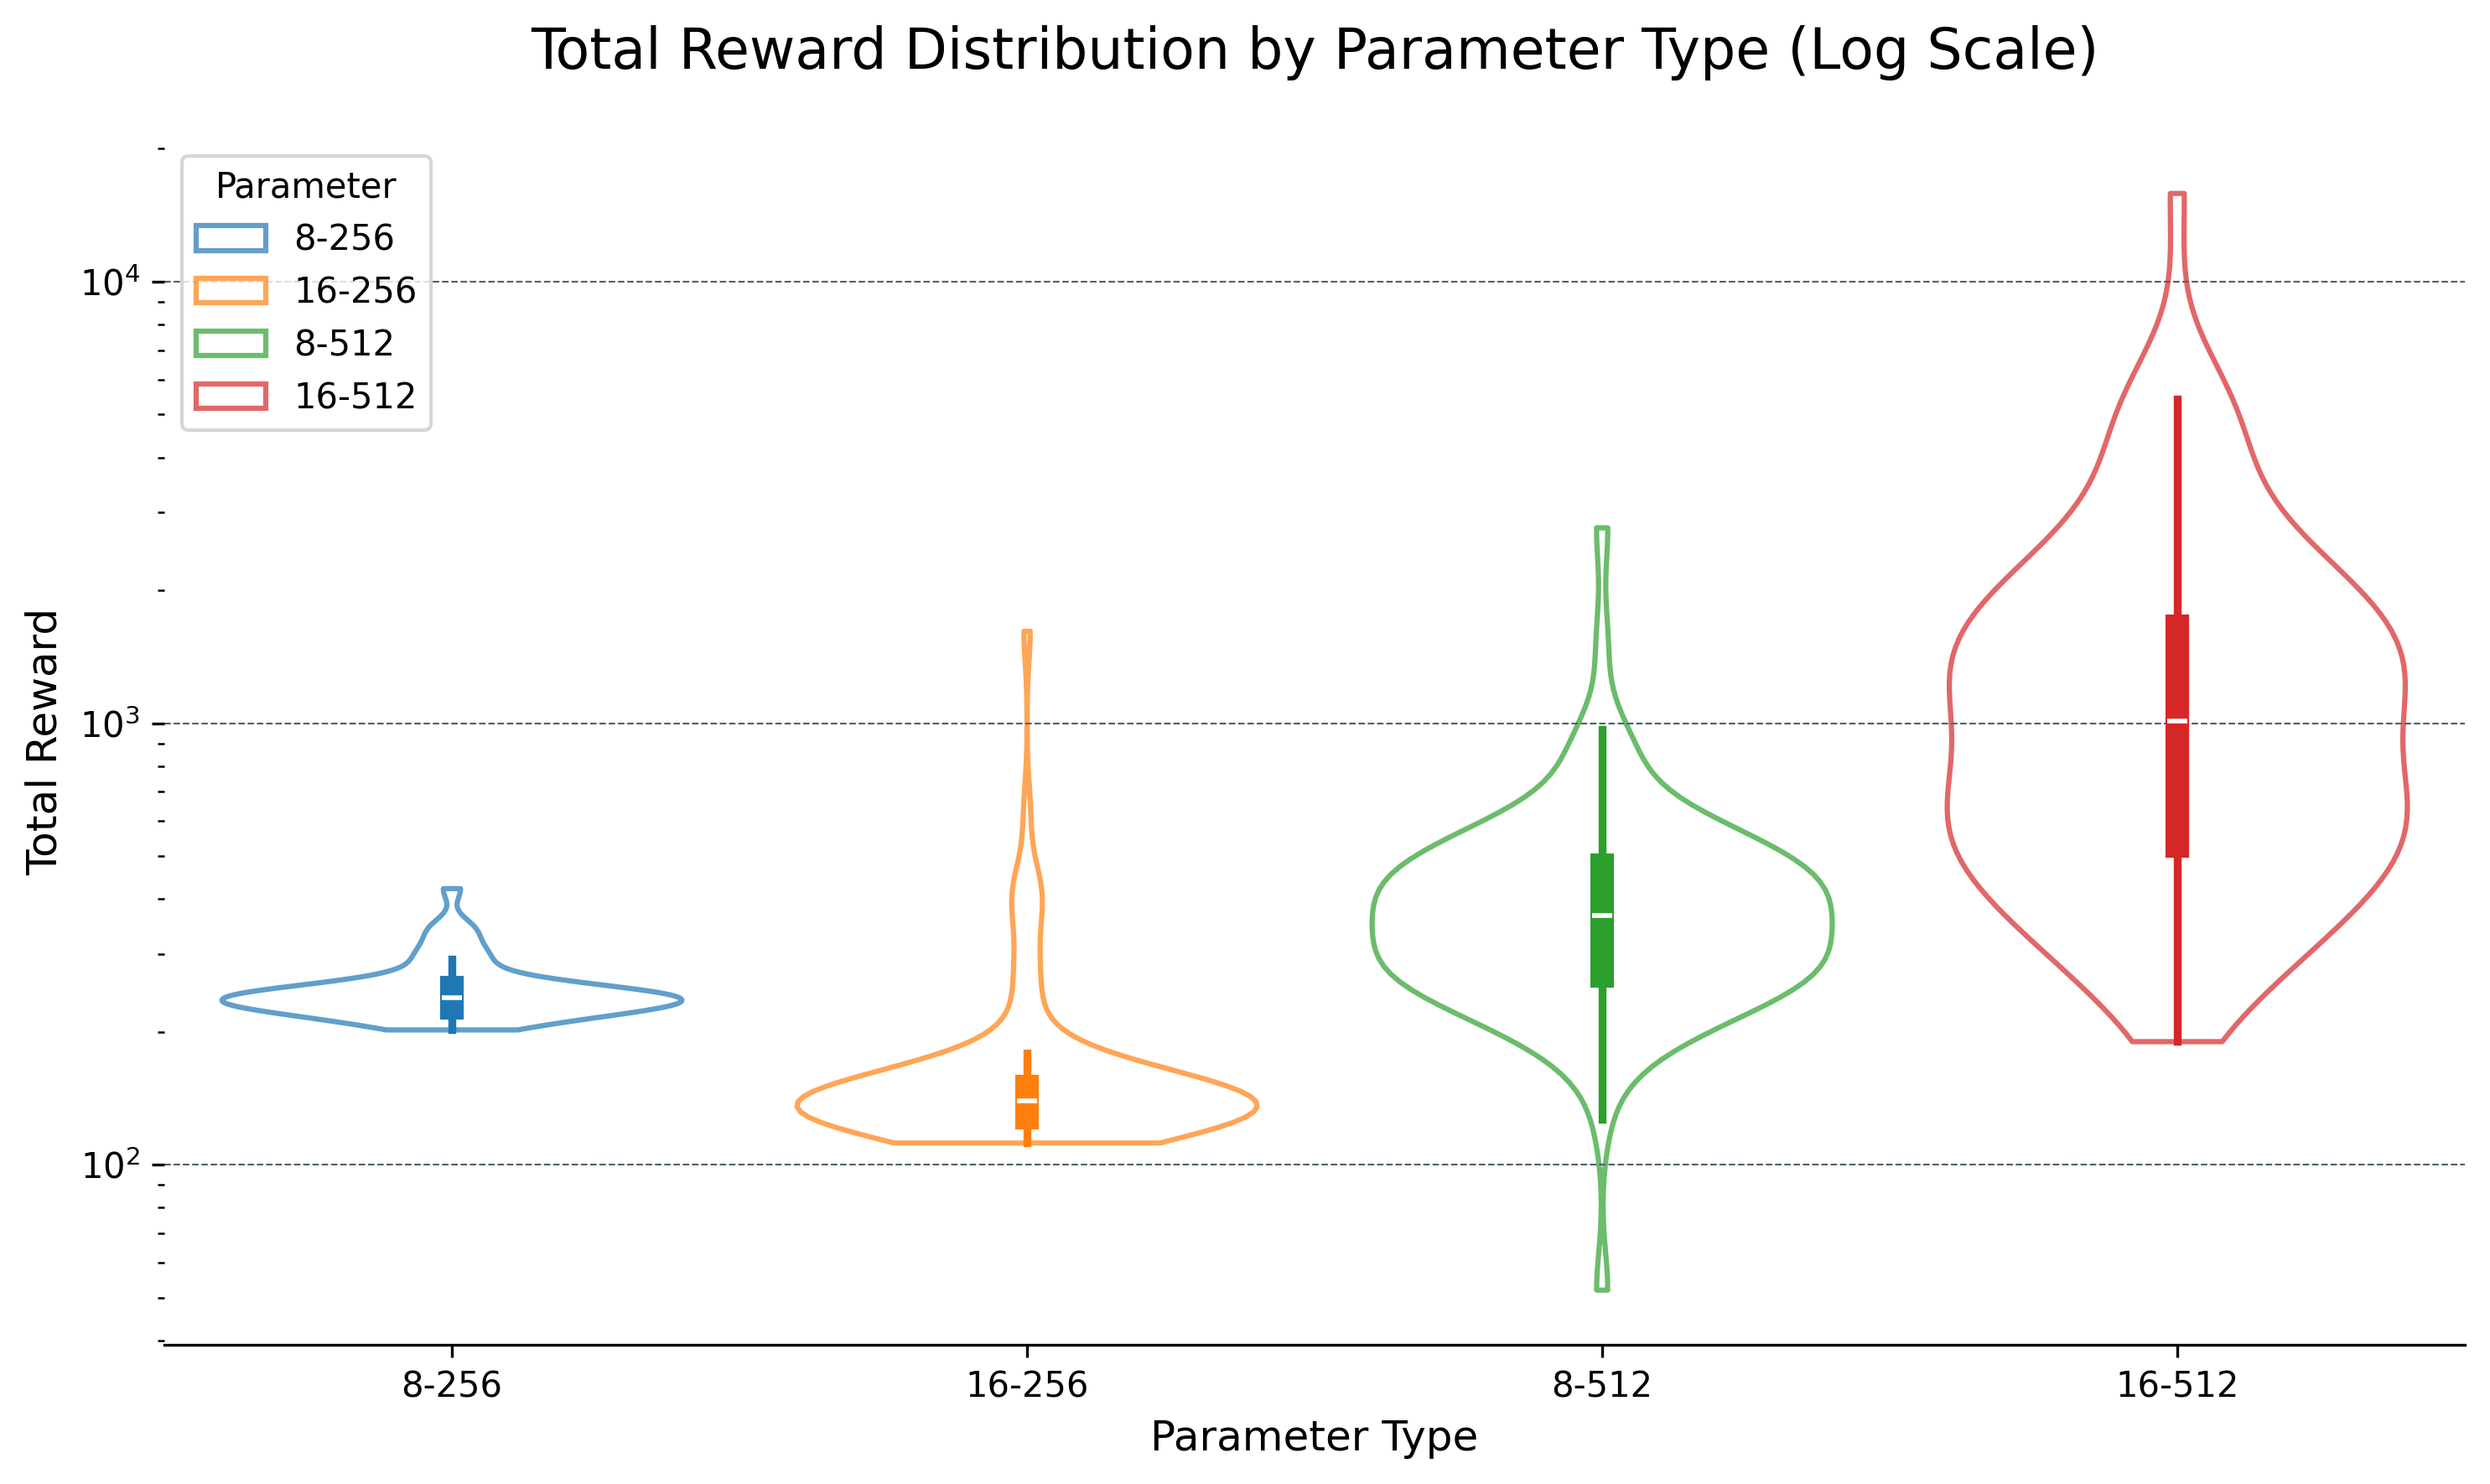

In [35]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(ls = "--", lw = 0.5, color = "#4E616C")

sns.violinplot(x='Parameter', y='Total Reward', data=df, cut=0, hue='Parameter', legend=True, alpha=0.7, fill=False, log_scale=True)
plt.title('Total Reward Distribution by Parameter Type (Log Scale)', fontsize=16, pad=20)
plt.xlabel('Parameter Type', fontsize=12)
plt.ylabel('Total Reward', fontsize=12)
plt.tight_layout()
plt.show()

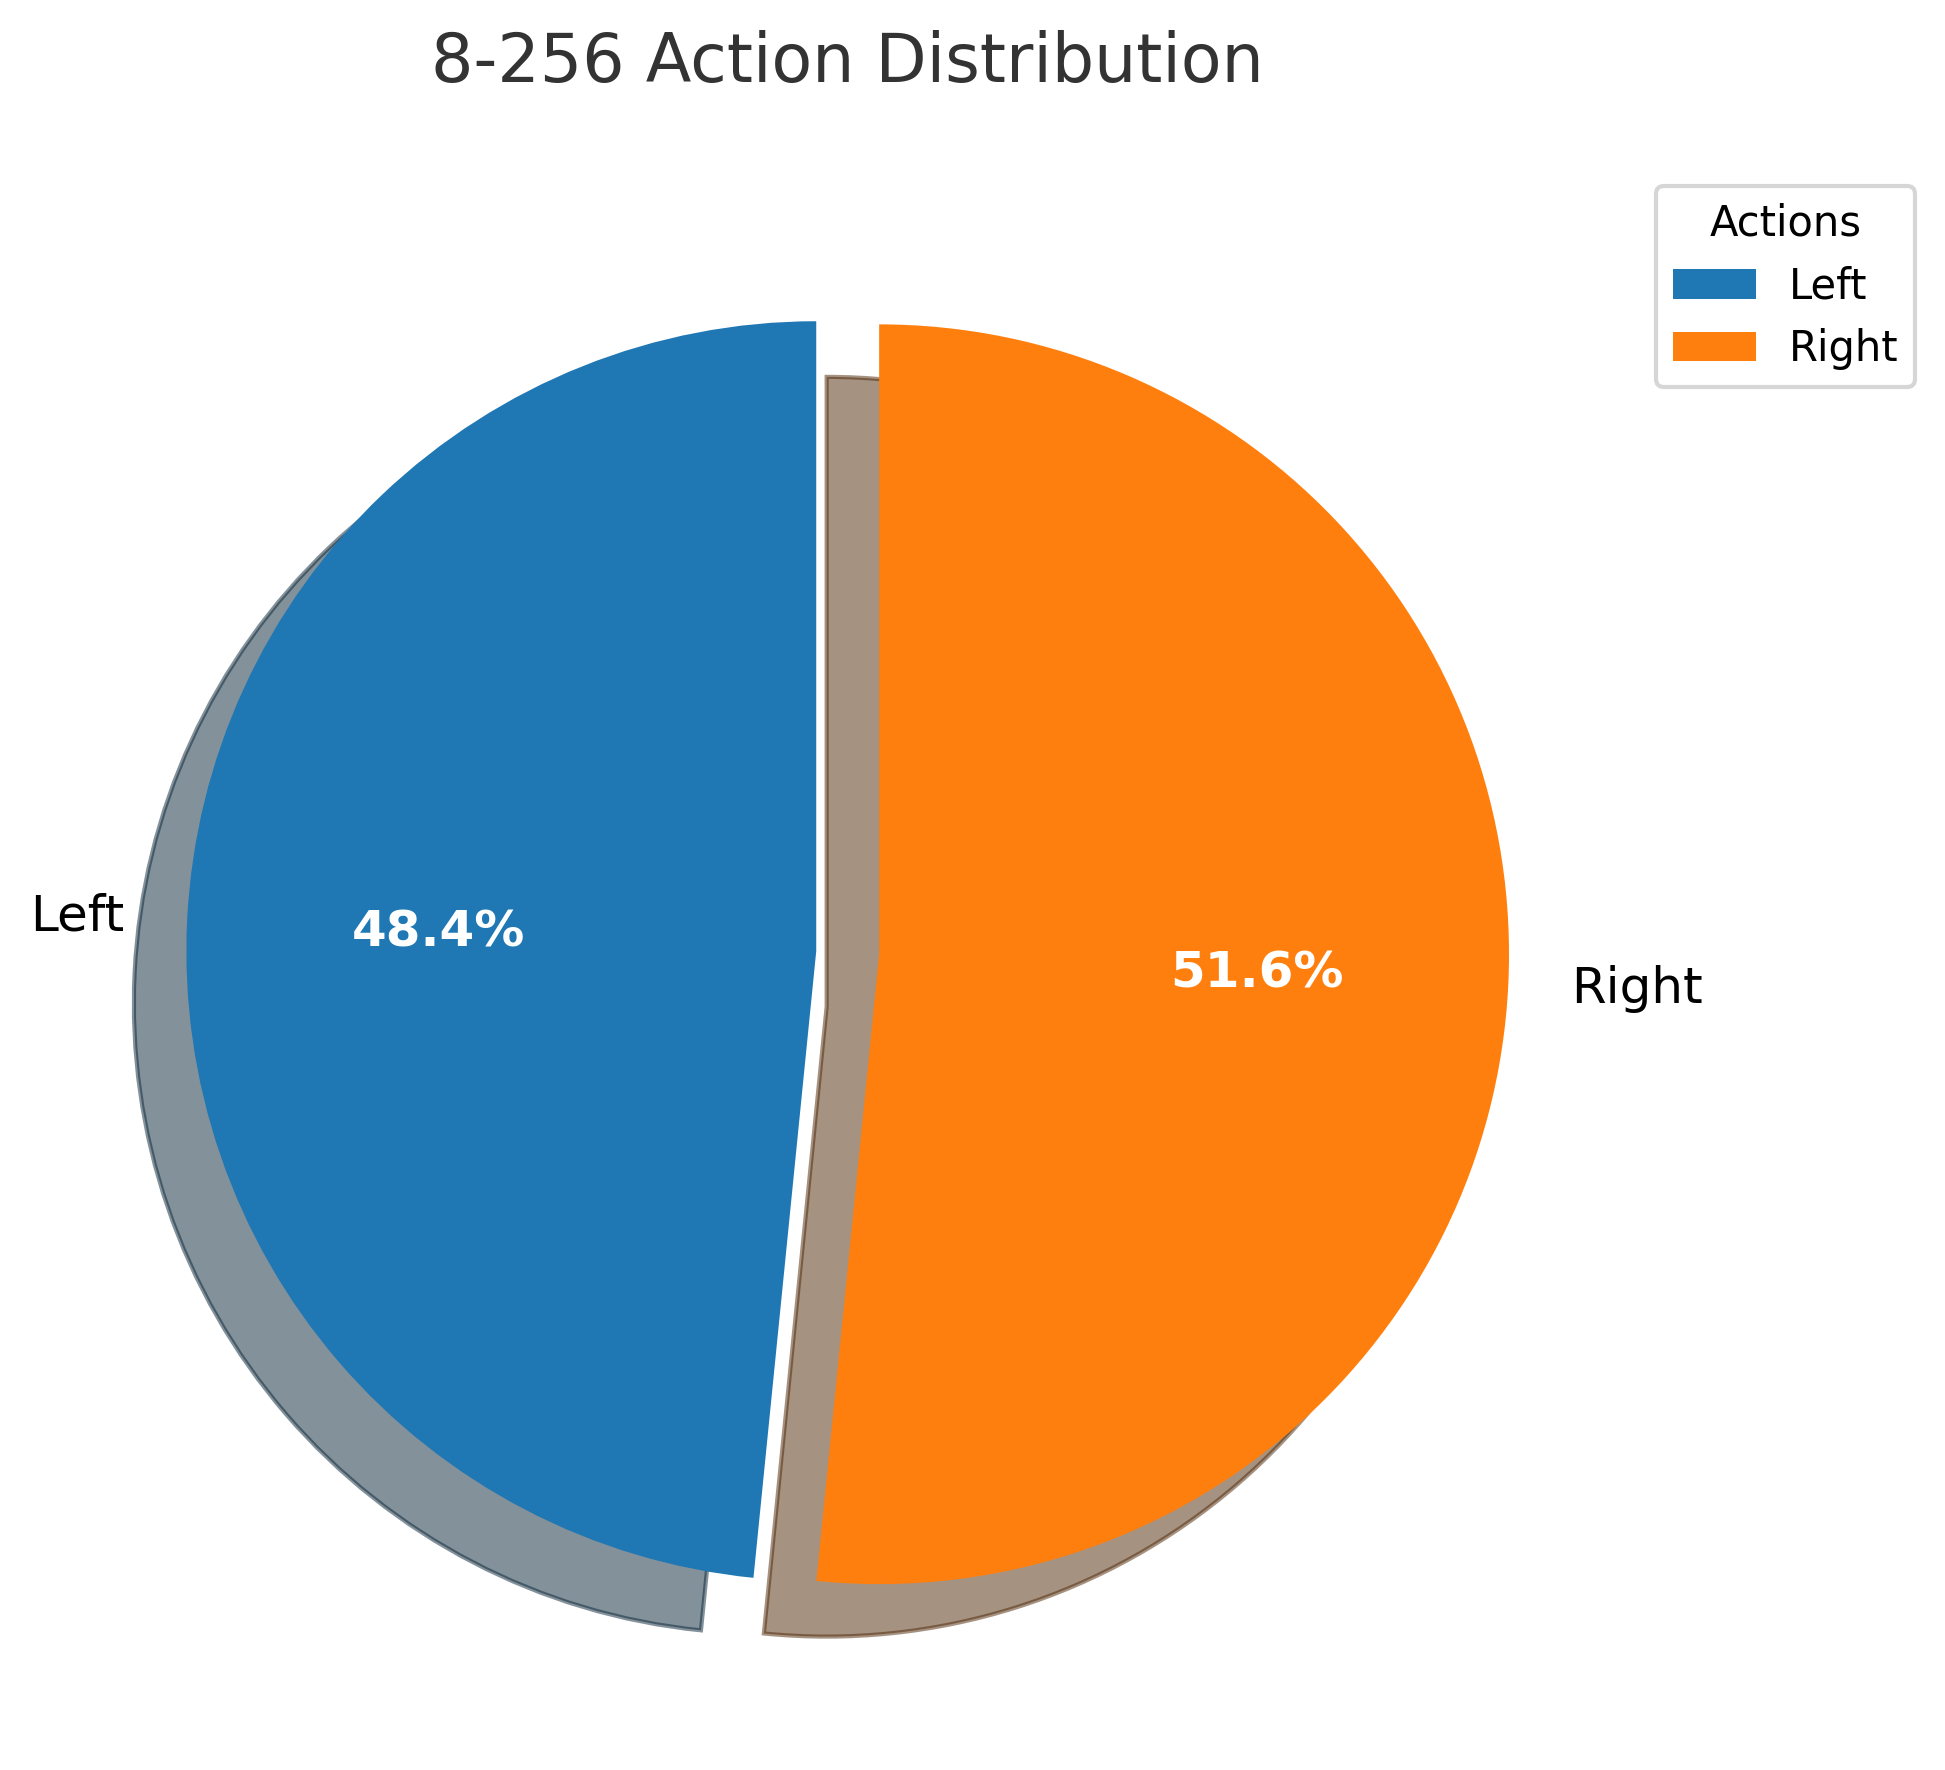

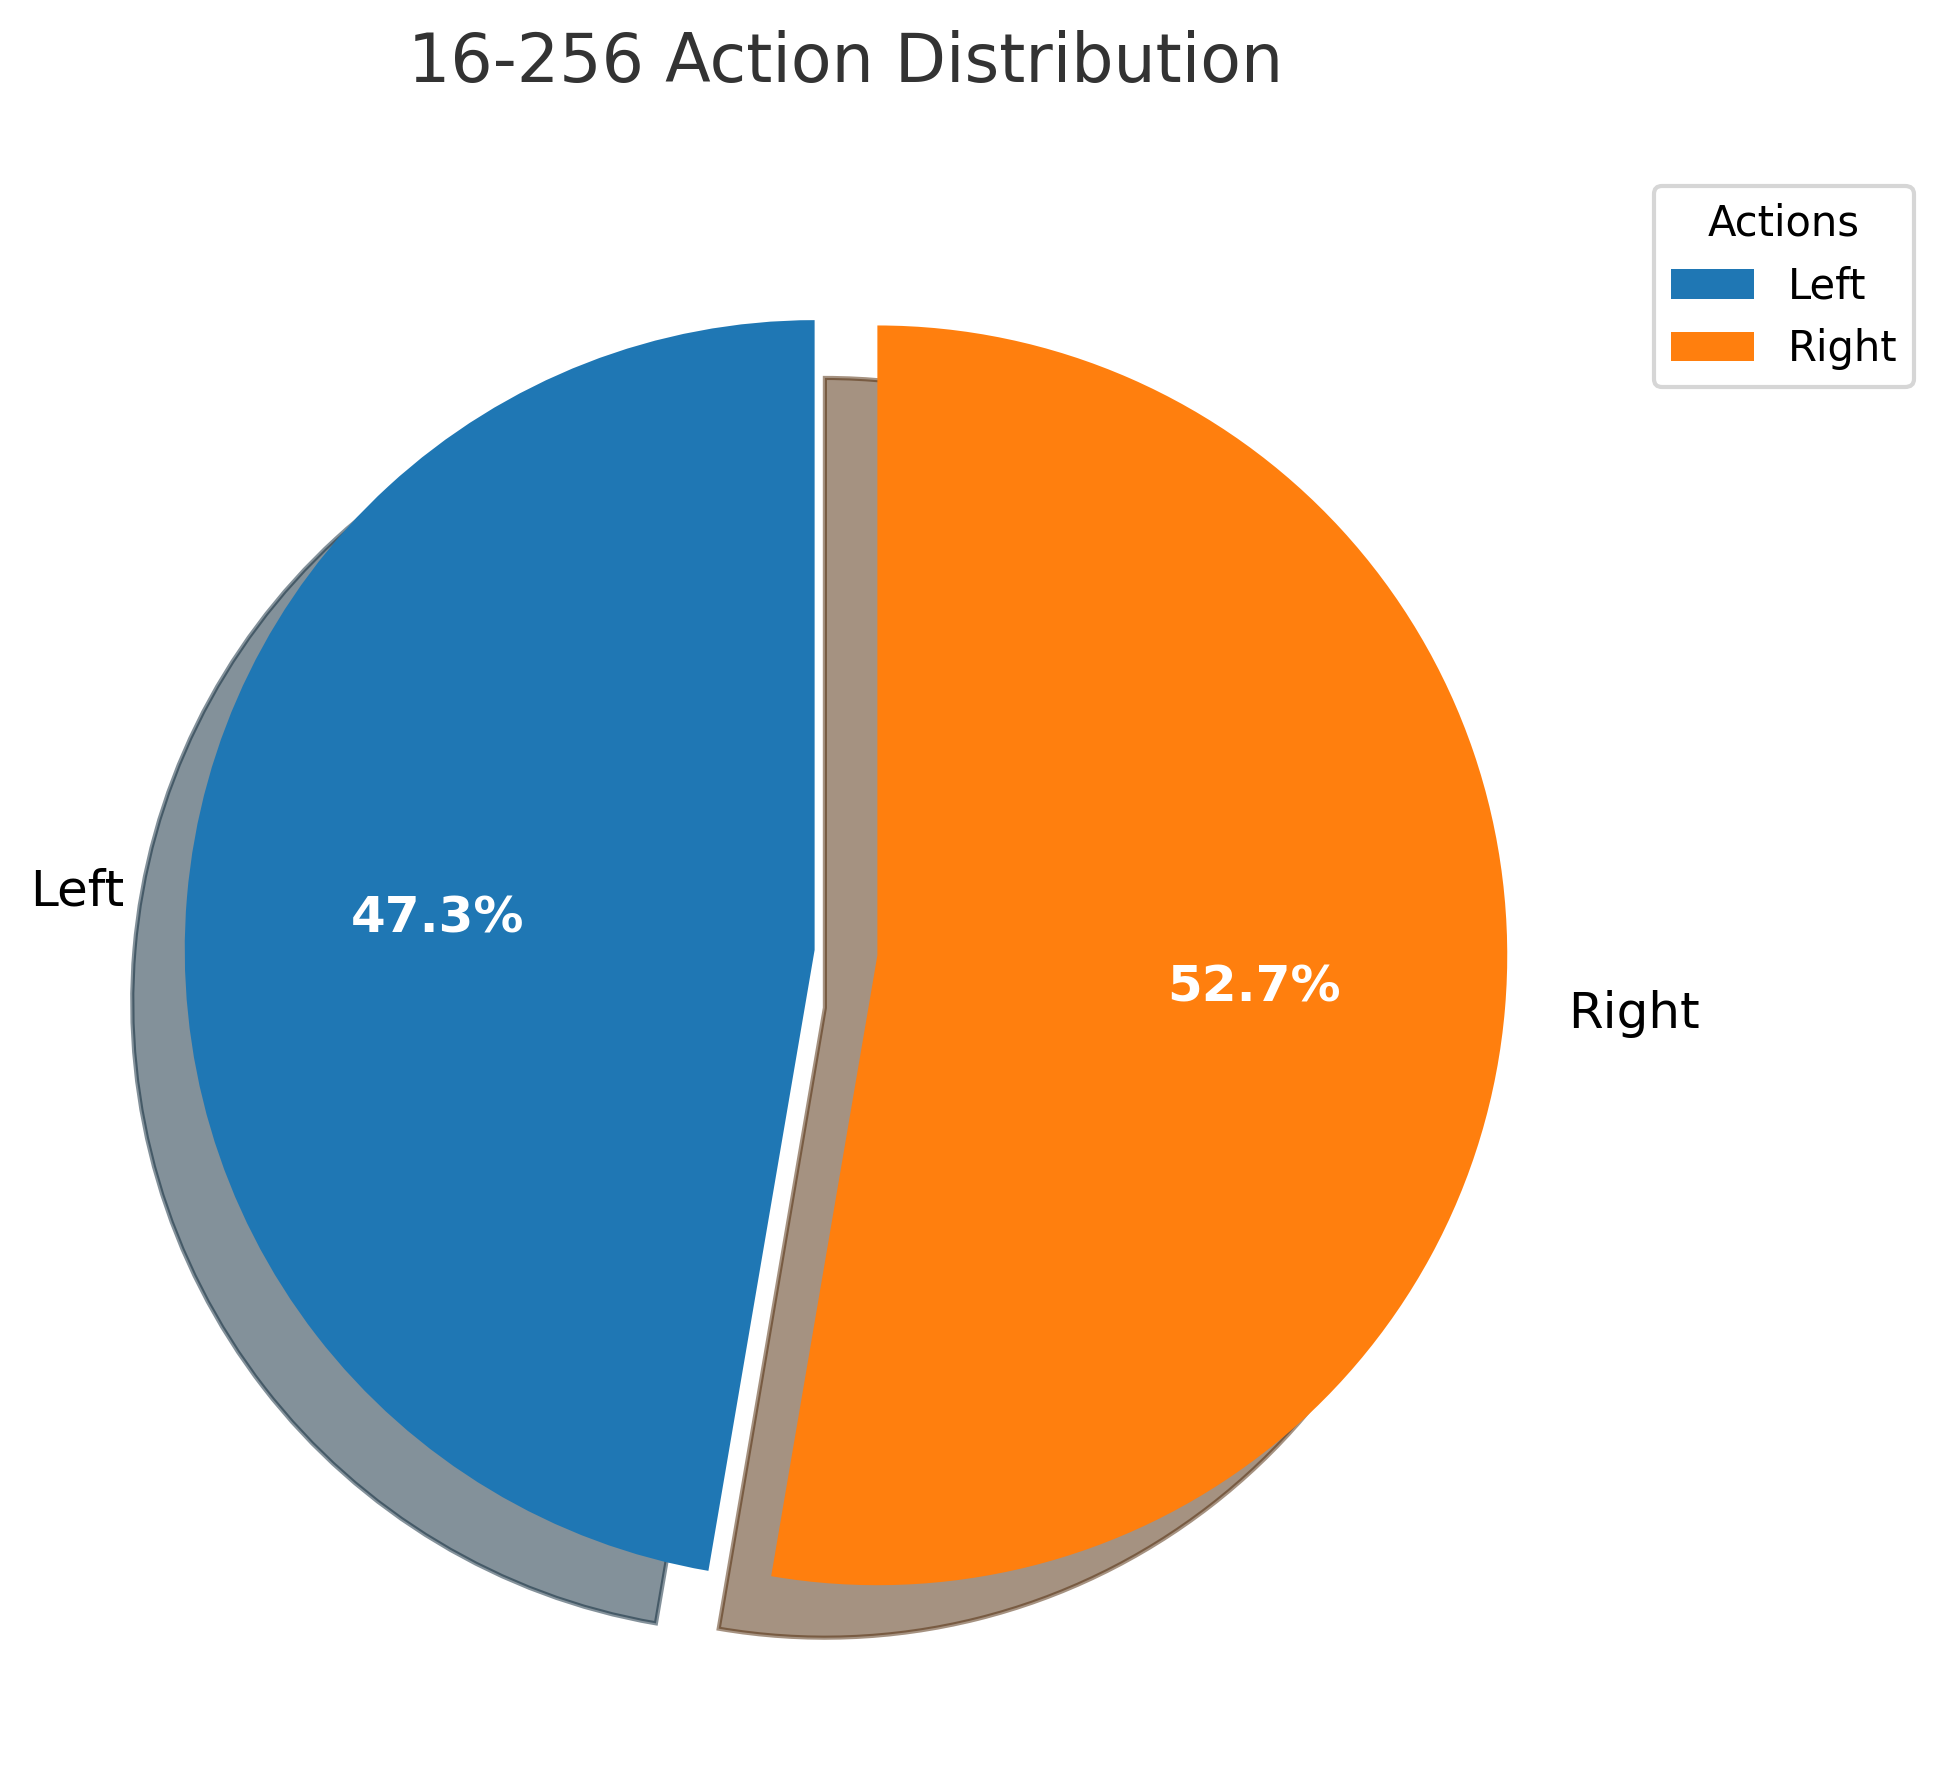

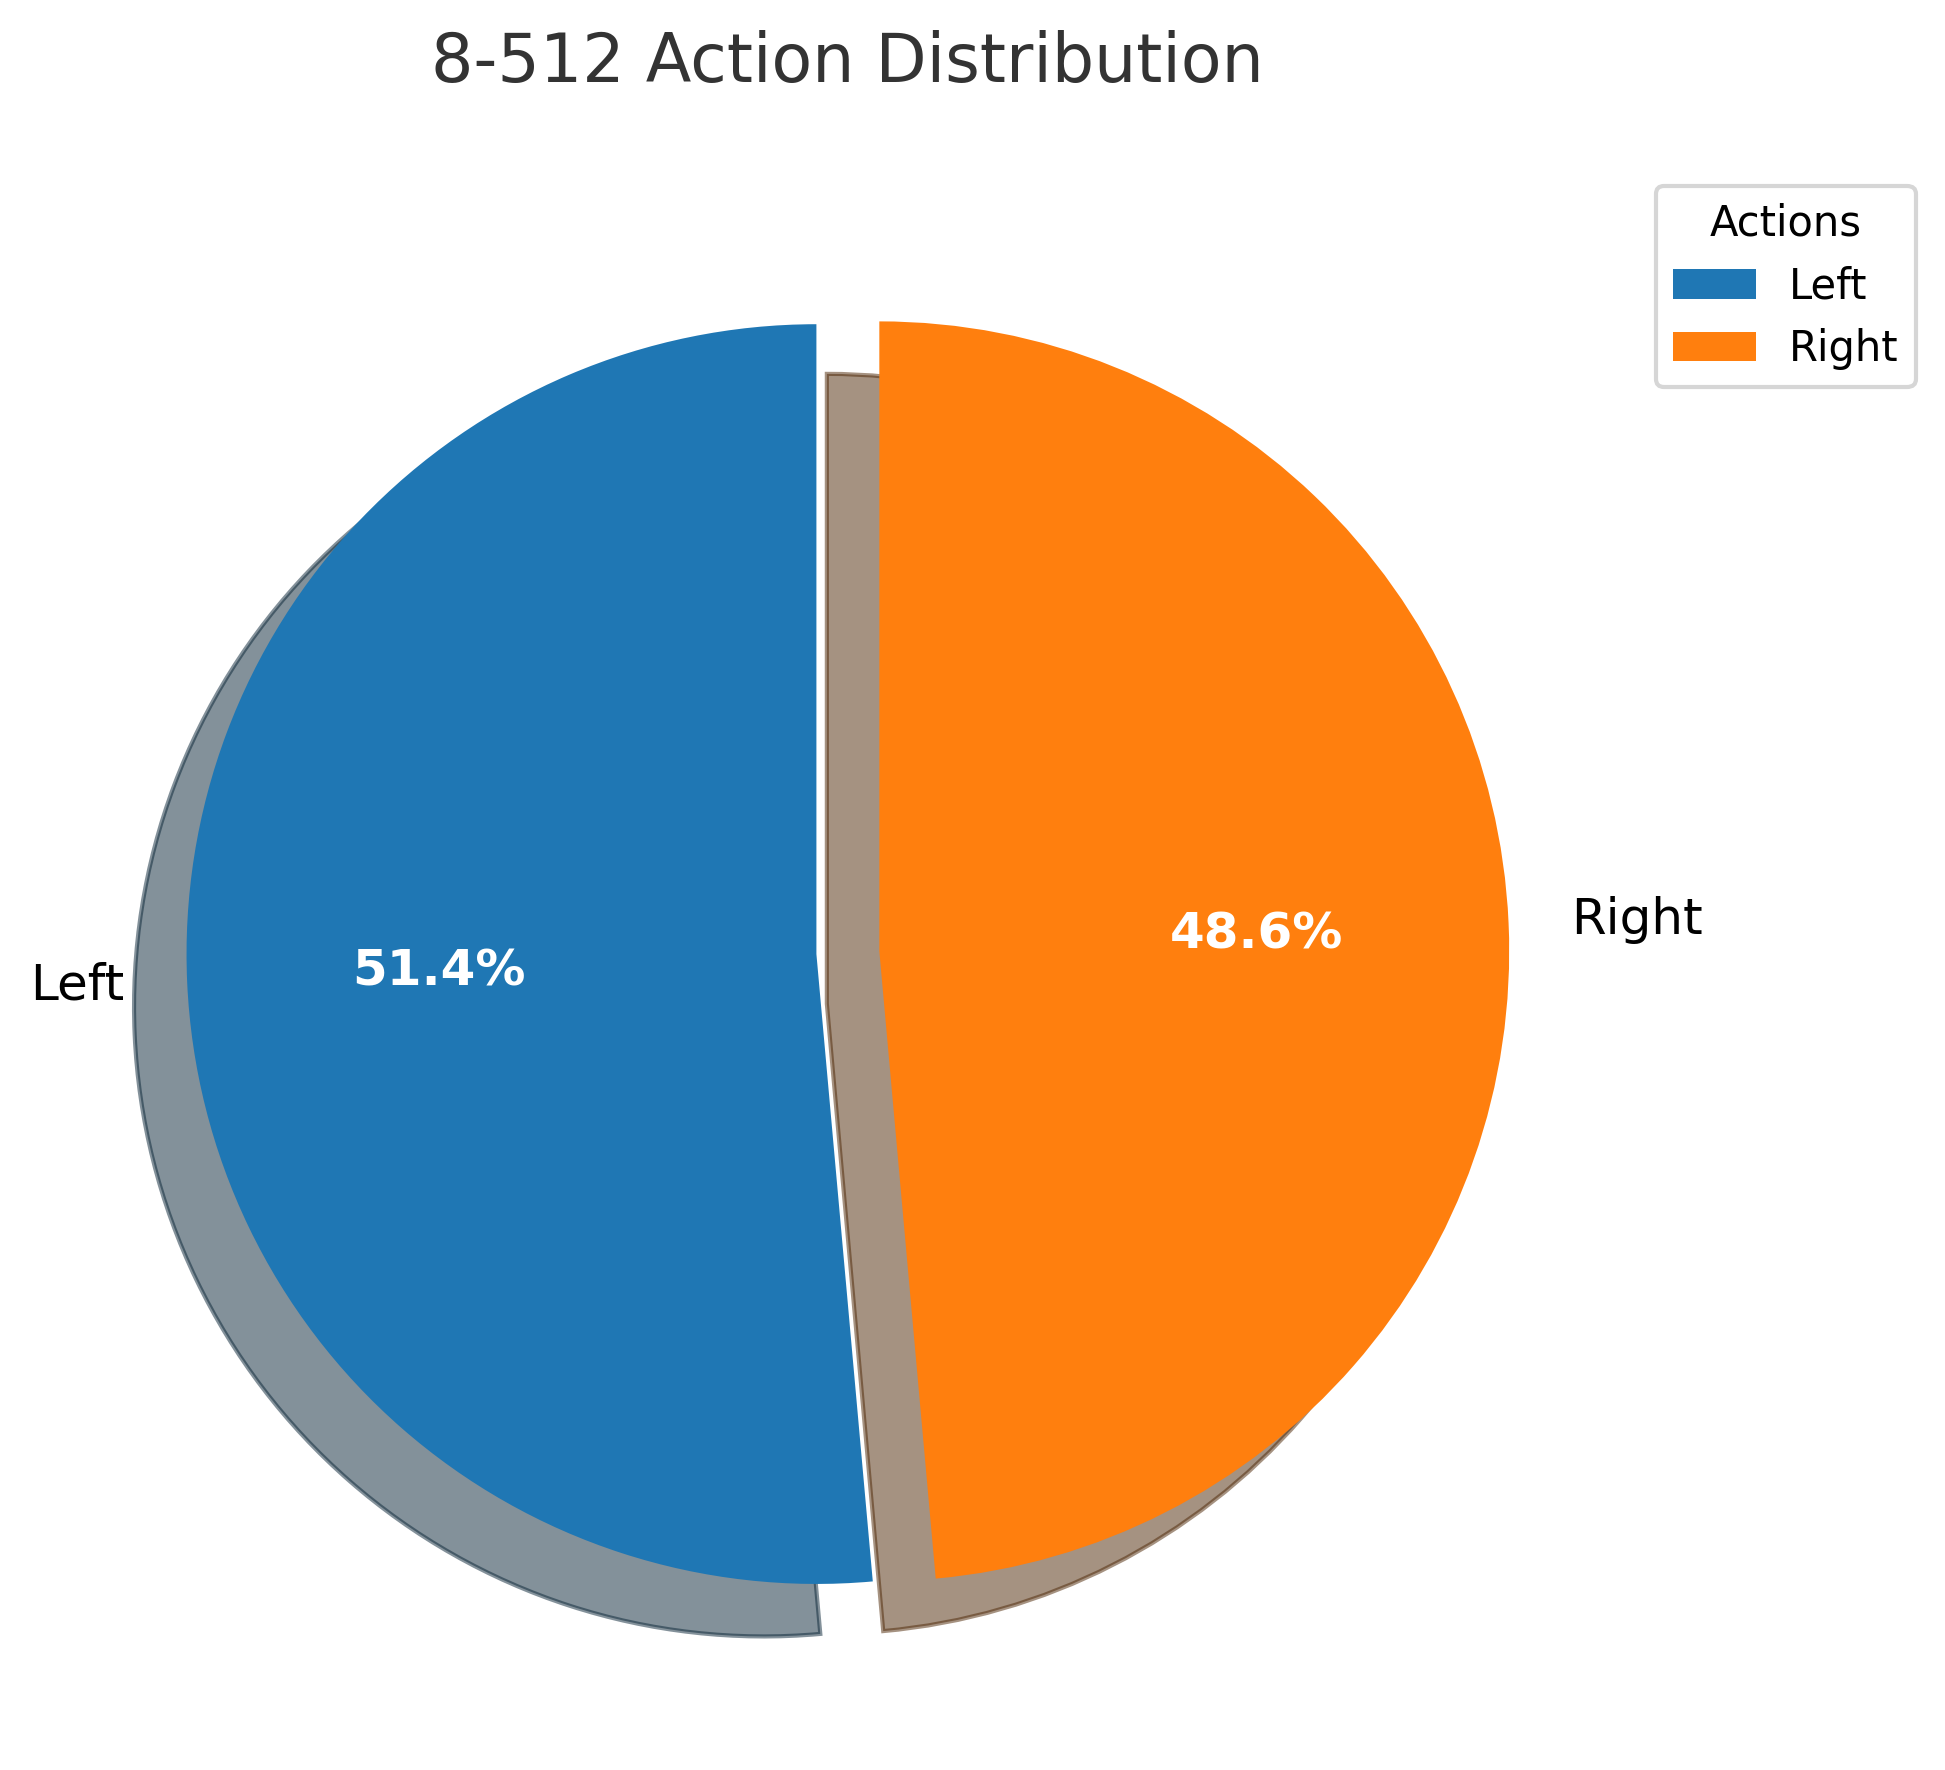

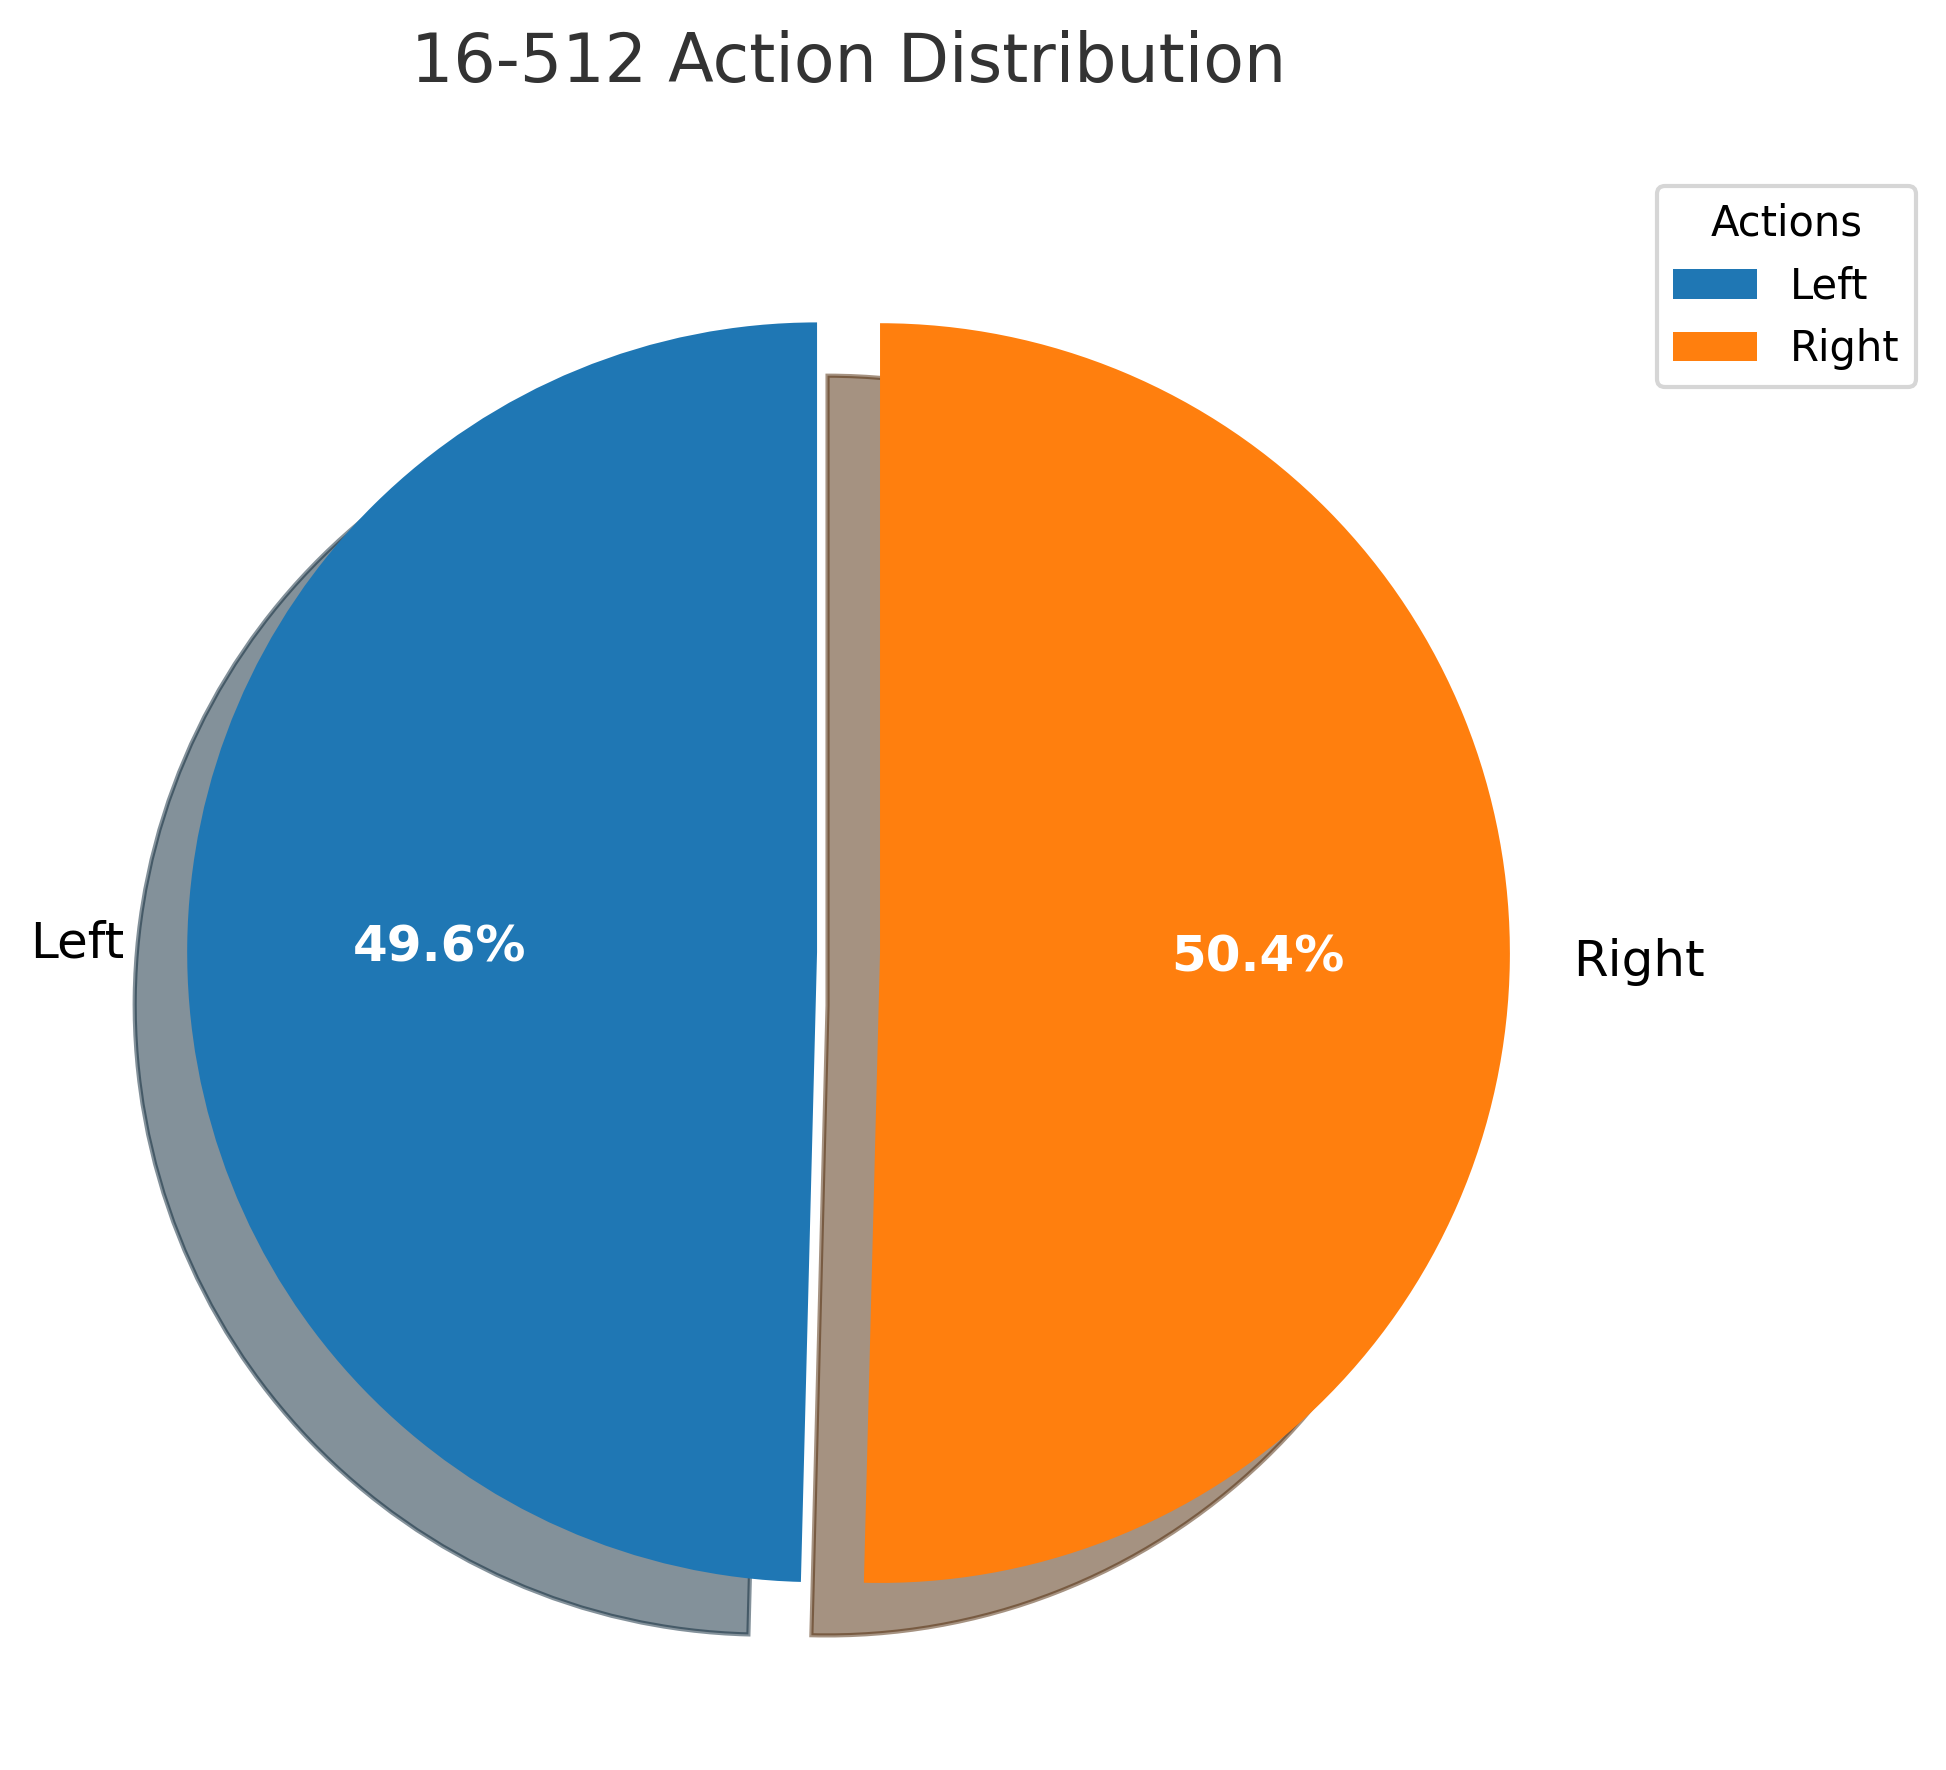

In [41]:
for pt in par_type:
    diff_action = []
    count_left = 0
    count_right = 0
    for i in range(1,101):
        df = pd.read_csv(f'data/{pt}/Trail_{i}.csv')
        count = df['Actions'].value_counts()
        diff_action.append(count[0] - count[1])
        count_left += count[0]
        count_right += count[1]
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(ls = "--", lw = 0.5, color = "#4E616C")

    data = [count_left, count_right]
    labels = ['Left', 'Right']
    colors = ['#1f77b4', '#ff7f0e']

    wedges, texts, autotexts = plt.pie(
        data,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        explode=(0.05, 0.05),  # 突出每块
        shadow=True,  # 添加阴影
        textprops={'fontsize': 12, 'color': 'black'}  # 标签字体样式
    )

    # 设置百分比文本样式
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
        autotext.set_weight('bold')

    # 添加标题
    plt.title(f'{pt} Action Distribution', fontsize=16, color="#333333", pad=20)

    # 自定义图例
    ax.legend(wedges, labels, title="Actions", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

    # 显示图
    plt.tight_layout()
    plt.show()


<Axes: ylabel='Count'>

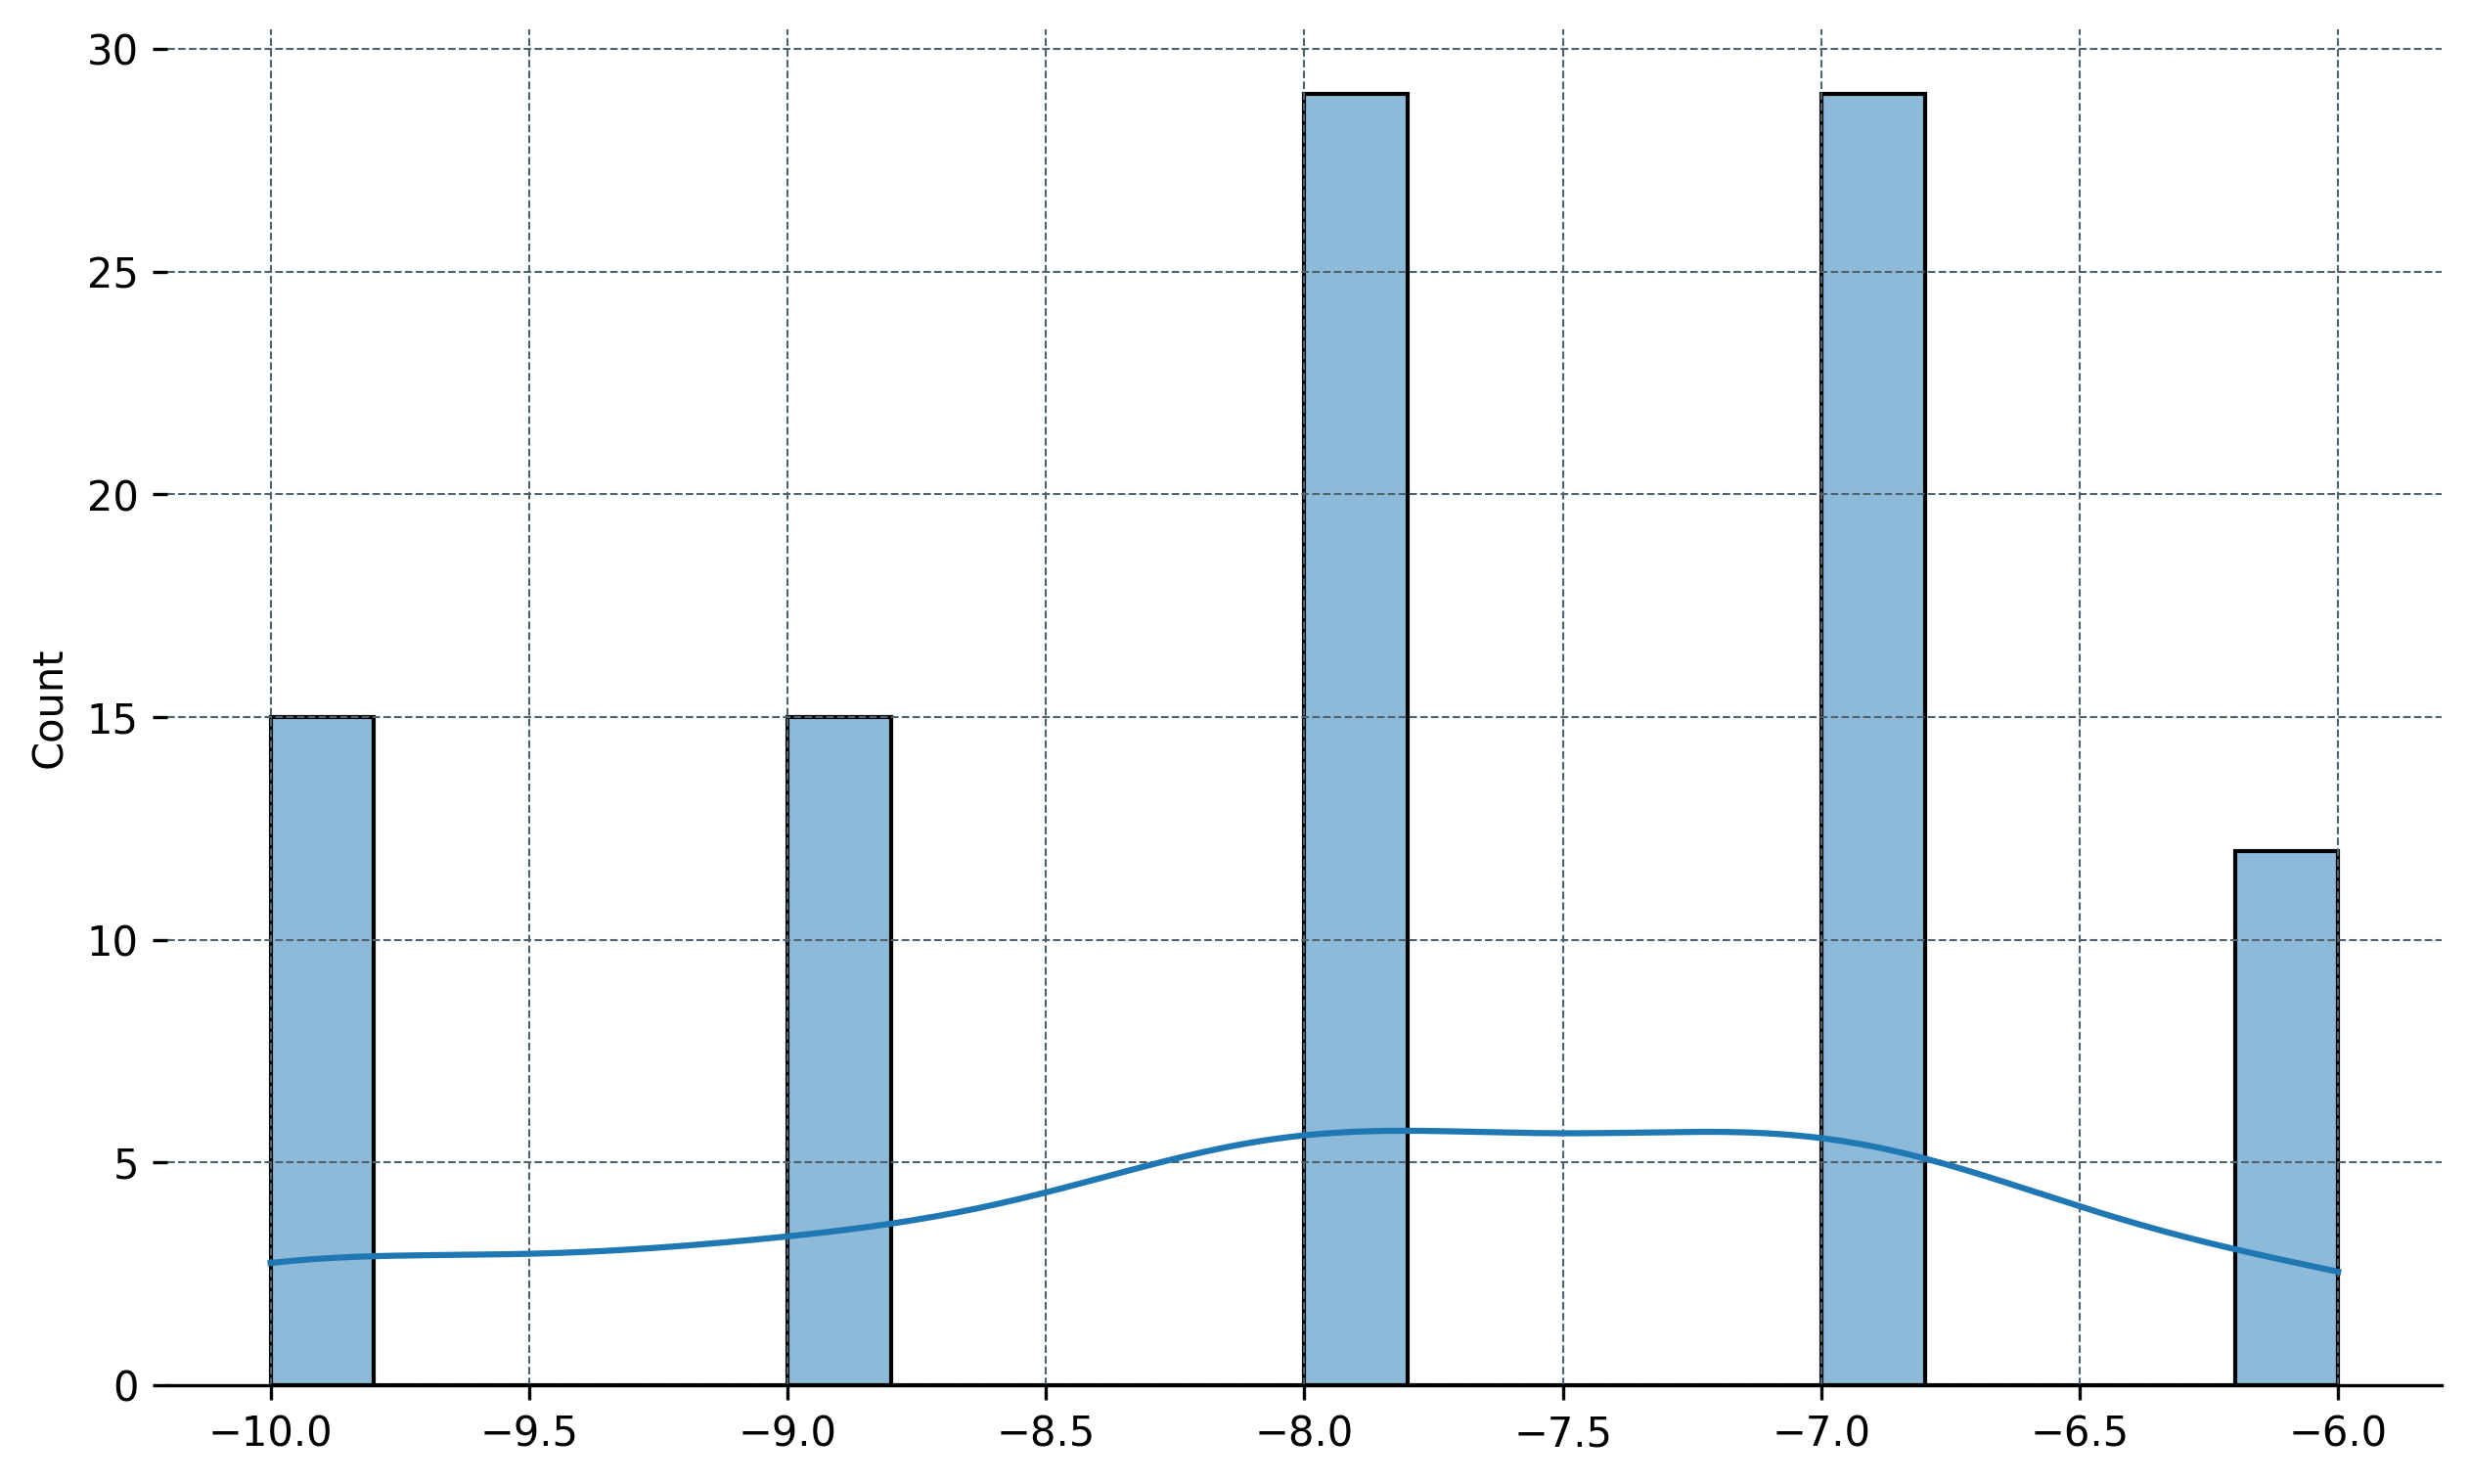

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(ls = "--", lw = 0.5, color = "#4E616C")

sns.histplot(diff_action, bins=20, kde=True, color='#1f77b4')

NameError: name 'count_left' is not defined

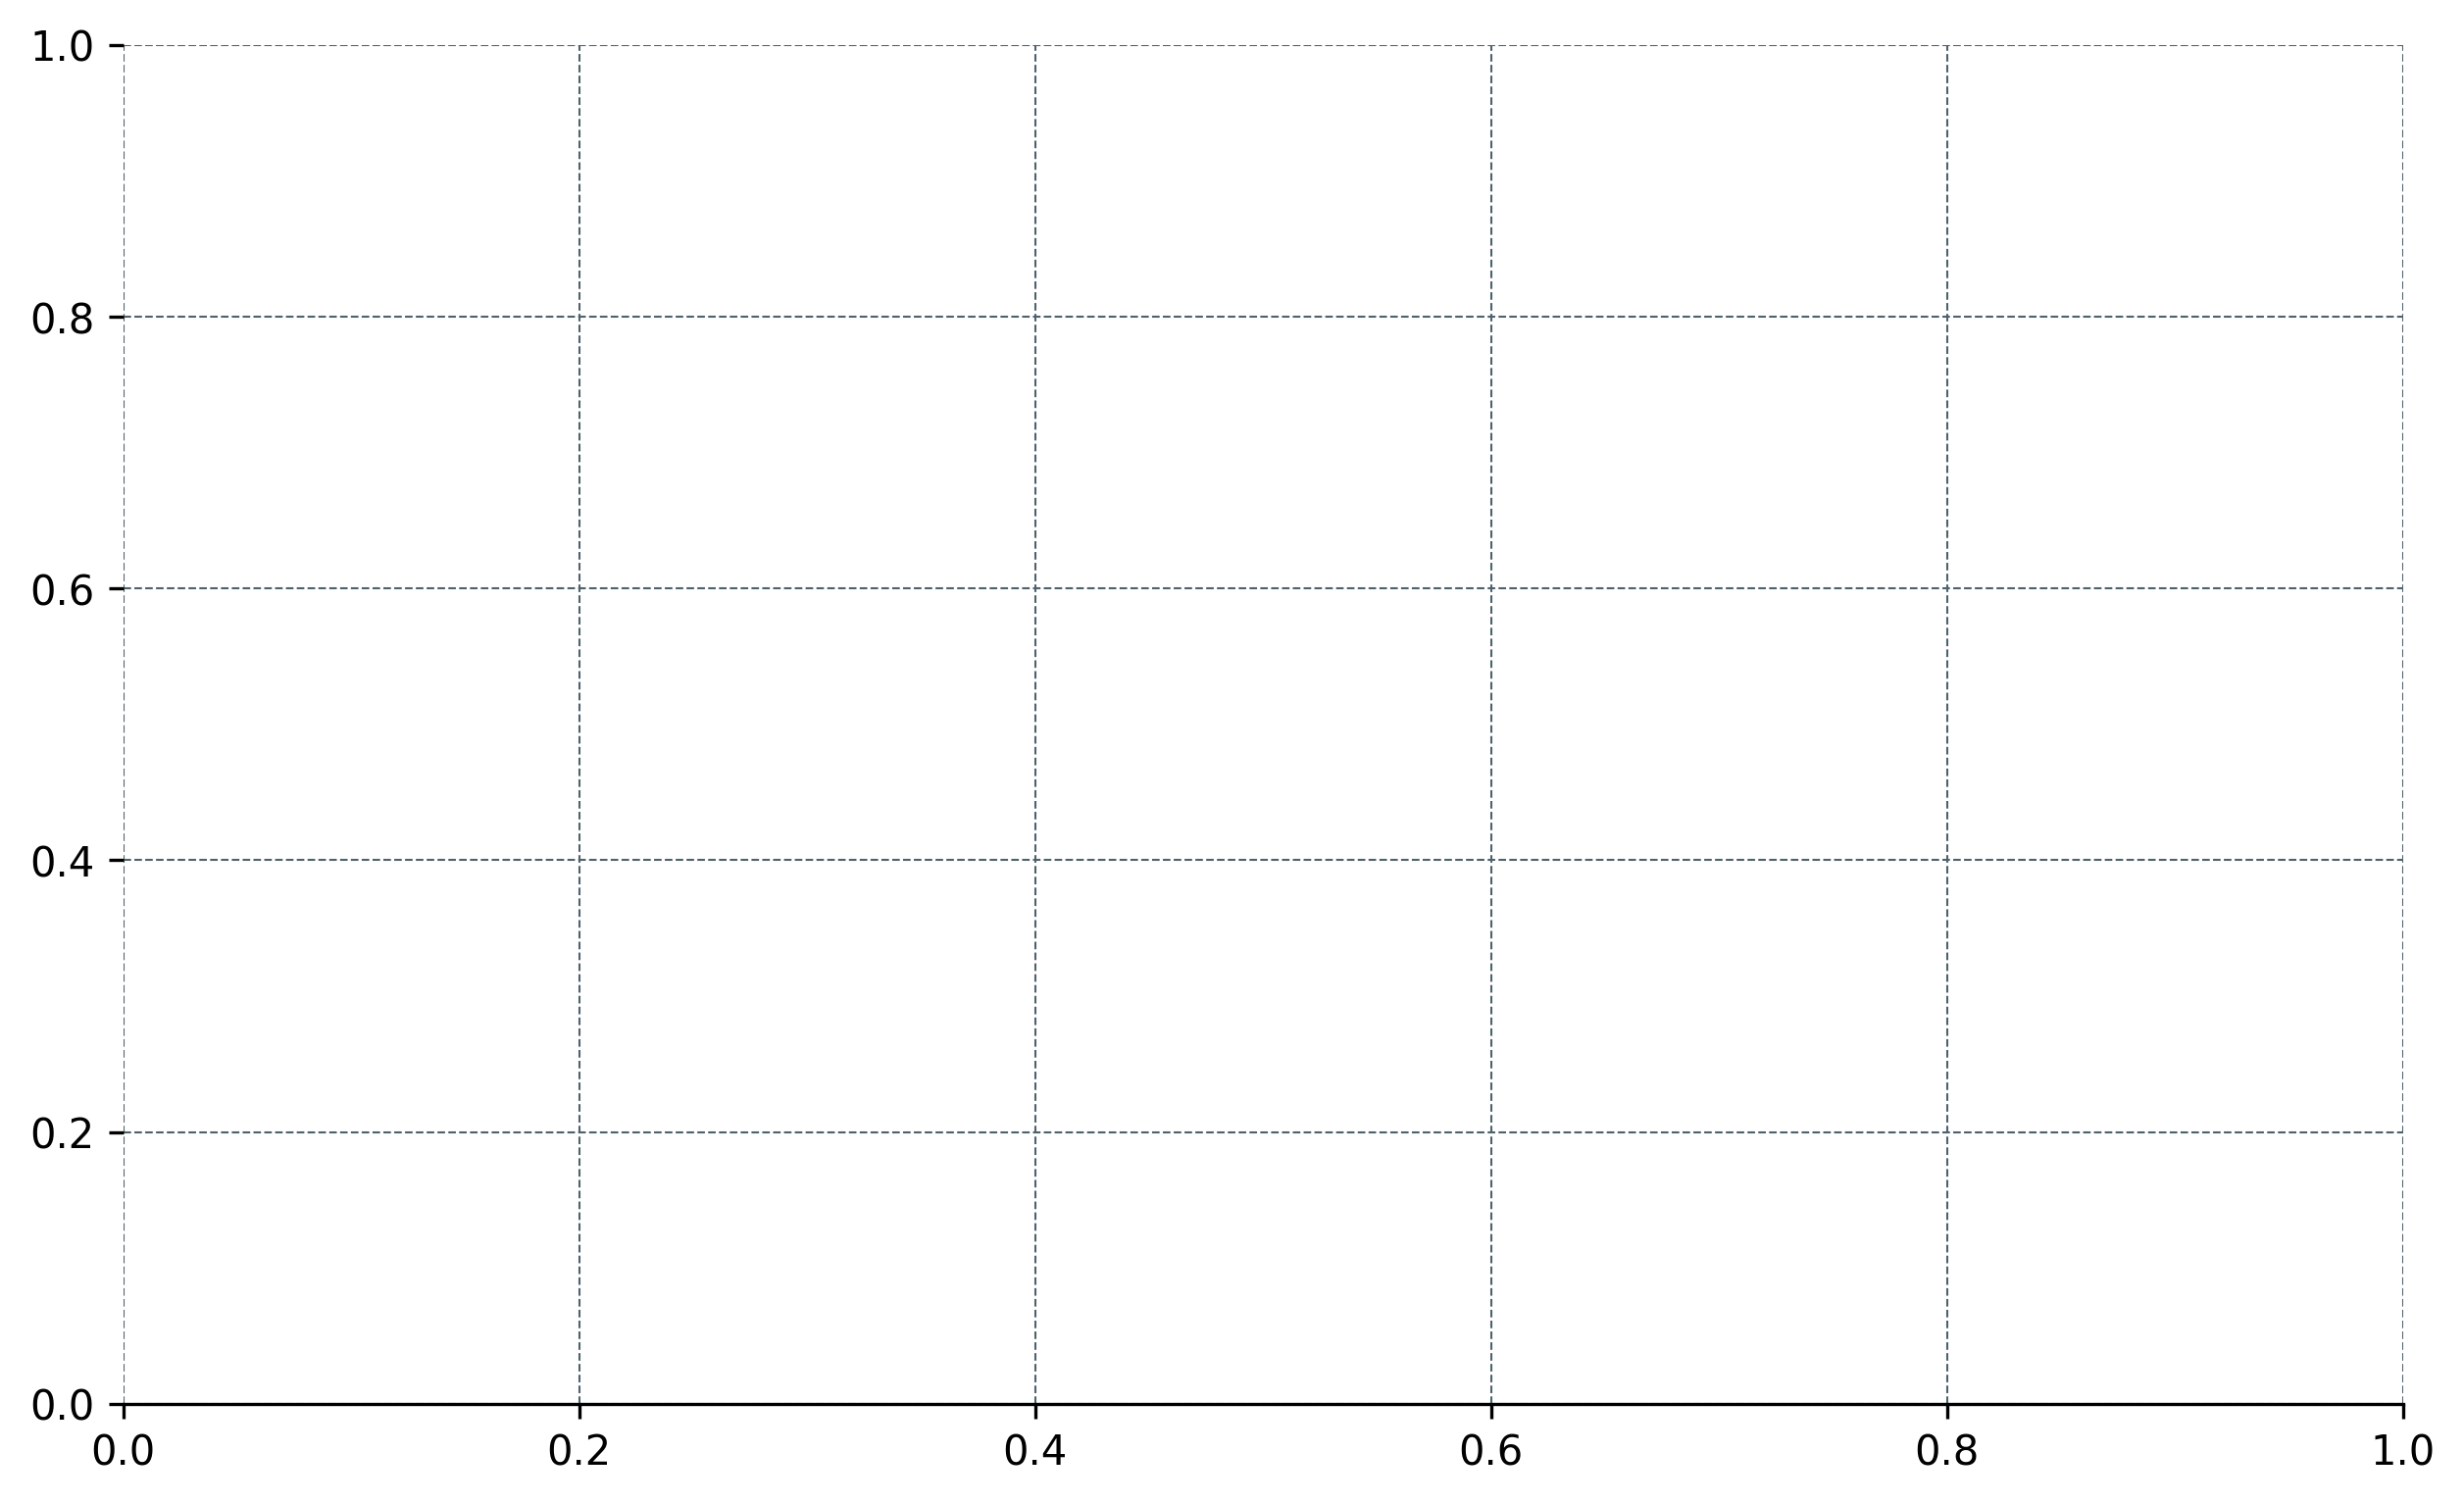